In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import metrics


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

In [6]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Input Data

In [2]:
df = pd.read_pickle('model.pkl')
total = df[(df['Event']=='SBD')&\
          (df['Total'].notnull())&(df['Total']>0)].reset_index(drop = True)[['Sex','Age','Tested','Total','BodyweightKg']].copy()

dead = df[(df['Dead'].notnull())&\
         (df['Dead']>0)].reset_index(drop = True)[['Sex','Age','Tested','Dead','BodyweightKg']].copy()

bench = df[(df['Bench'].notnull())&\
          (df['Bench']>0)].reset_index(drop = True)[['Sex','Age','Tested','Bench','BodyweightKg']].copy()

squat = df[(df['Squat'].notnull())&\
          (df['Squat']>0)].reset_index(drop = True)[['Sex','Age','Tested','Squat','BodyweightKg']].copy()

# Generalized Model

Feature Engineering

Dummy Variable
- Drug Tested
- Sex

In [3]:
total_g = pd.get_dummies(total,columns = ['Tested','Sex'], drop_first = True)
squat_g = pd.get_dummies(squat,columns = ['Tested','Sex'], drop_first = True)
bench_g = pd.get_dummies(bench,columns = ['Tested','Sex'], drop_first = True)
dead_g = pd.get_dummies(dead,columns = ['Tested','Sex'], drop_first = True)

# Predicting Total Weight Lifted

Linear Regression Model

In [8]:
def lr_model(total):
    # Shape of data set
    print(str(len(total))+' rows.\n'+str(len(total.columns))+' columns.')
    print(str(len(total.columns)-1)+' features.')

    # Plotting the distribution of the target variable
    plt.figure(figsize=(18, 15))
    plt.subplot(2, 1, 1)
    col = total.columns[1]
    total[col].plot(kind='hist', bins=10, edgecolor='black')
    plt.xlabel('Weight')
    plt.title('Distribution of ' + col)

    # Preprocessing
    X = total.drop([col], axis=1)
    y = total[col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Regression modeling
    lm = LinearRegression()
    lm.fit(X_train, y_train)

    # Predictions
    plm = lm.predict(X_test)

    # Plotting Actual vs. Predicted values
    plt.subplot(2, 1, 2)
    plt.scatter(y_test, plm)
    plt.plot(y_test, y_test, "r")
    plt.xlabel('Actual ' + col)
    plt.ylabel('Predicted ' + col)

    # Display the linear regression formula with coefficients
    coef_string = ' + '.join([f'{coef:.2f} * {feature}' for coef, feature in zip(lm.coef_, X.columns)])
    equation = f'Y = {lm.intercept_:.2f} + {coef_string}'
    plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

    # Evaluate the model
    print("MSE:", metrics.mean_squared_error(y_test, plm))
    print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, plm)))
    print("RRMSE:", np.sqrt(metrics.mean_squared_error(y_test, plm)) / y_test.mean())
    print("MAE:", metrics.mean_absolute_error(y_test, plm))
    print("RMAE:", metrics.mean_absolute_error(y_test, plm) / y_test.mean())
    print("EV:", metrics.explained_variance_score(y_test, plm))
    print("R2:", metrics.r2_score(y_test, plm))

    # Validation Curve Plot
    cv_scores = cross_val_score(lm, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print("Cross-Validation RMSE:", np.sqrt(-cv_scores.mean()))
    plot_learning_curve(lm, "Learning Curve", X_train, y_train, cv=5, n_jobs=-1)

    plt.tight_layout()
    plt.show()

460615 rows.
5 columns.
4 features.
MSE: 8667.143348270161
RMSE: 93.09749378082184
RRMSE: 0.19958476874047032
MAE: 71.35529264454247
RMAE: 0.1529732864173336
EV: 0.6414916881246572
R2: 0.641478988500631
Cross-Validation RMSE: 93.24111253297602


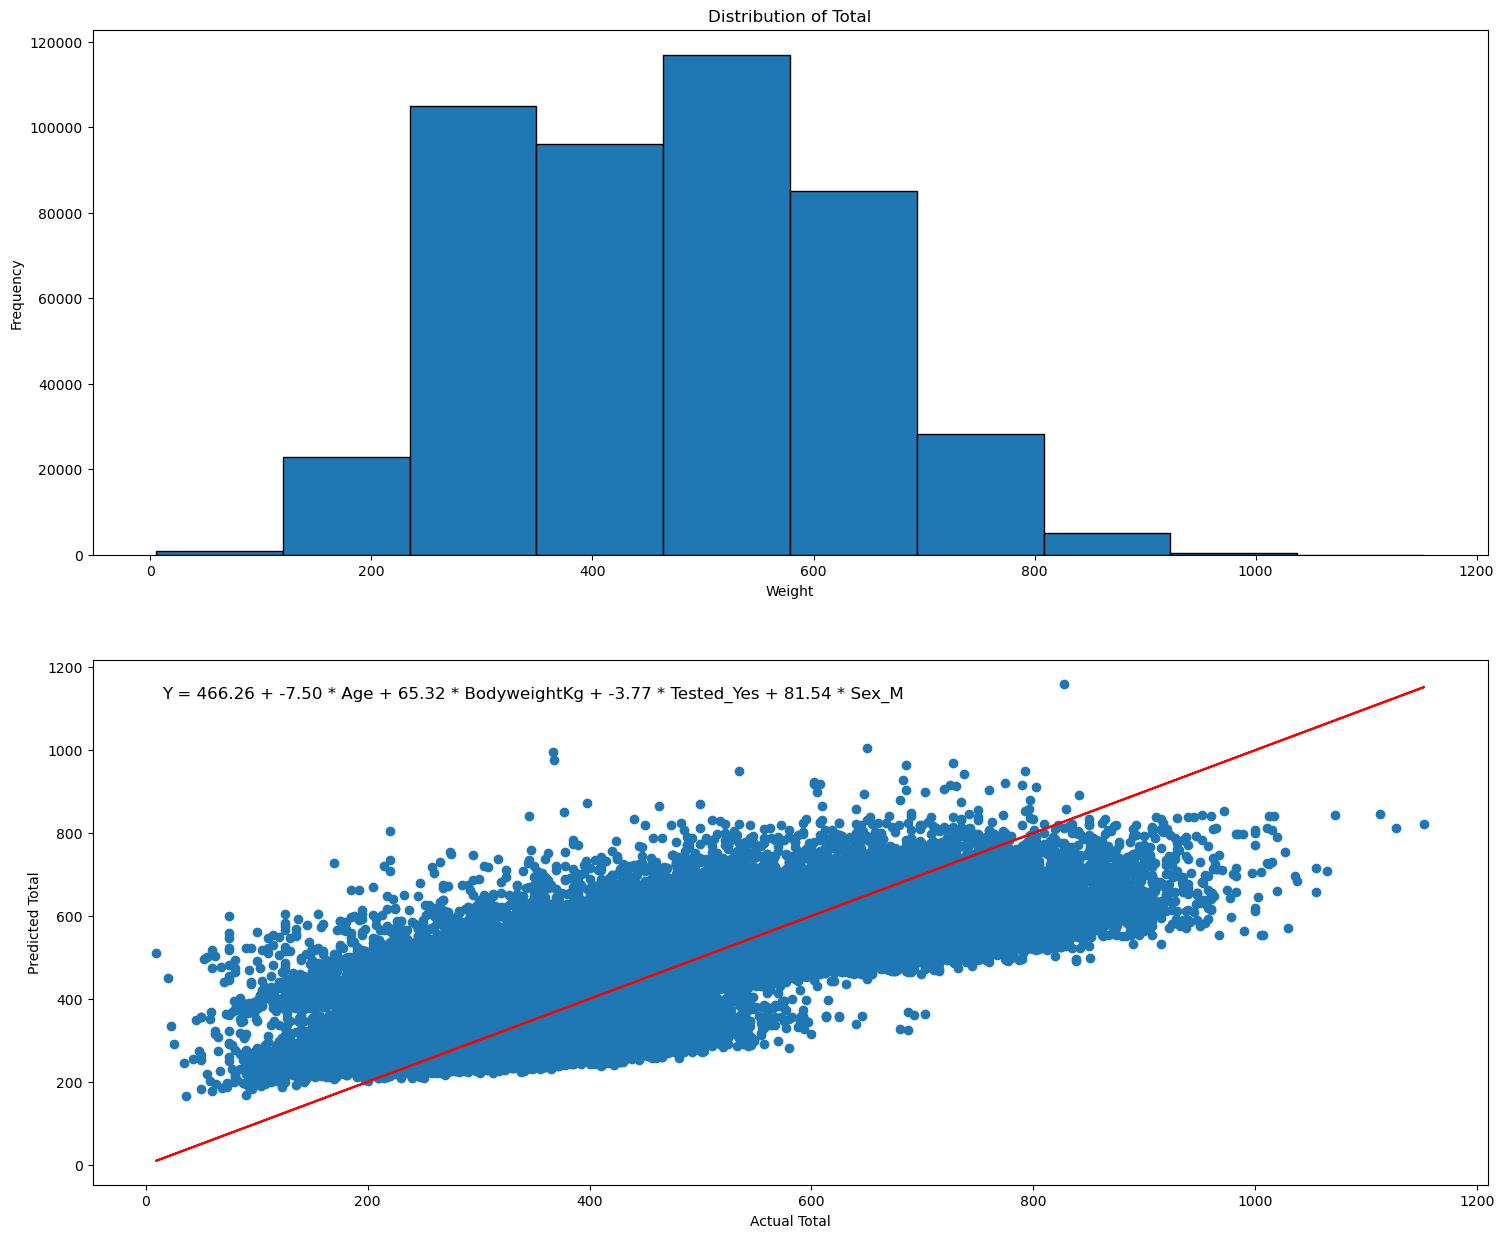

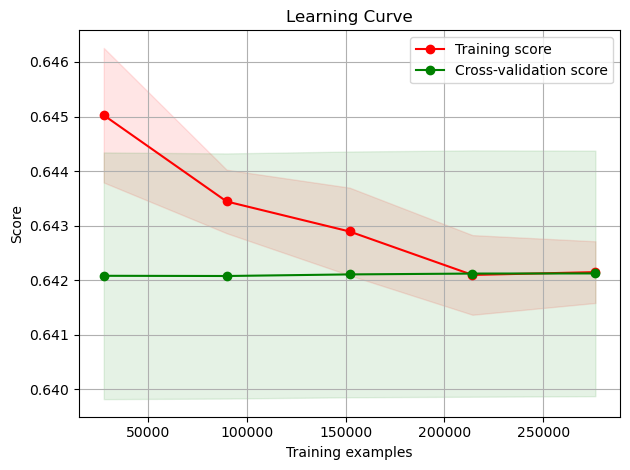

In [9]:
lr_model(total_g)

473535 rows.
5 columns.
4 features.
MSE: 1383.6448934280552
RMSE: 37.197377507400375
RRMSE: 0.2232121694315301
MAE: 28.446353395434883
RMAE: 0.17069945999681707
EV: 0.590937628855257
R2: 0.5909339007160221
Cross-Validation RMSE: 37.13357778282657


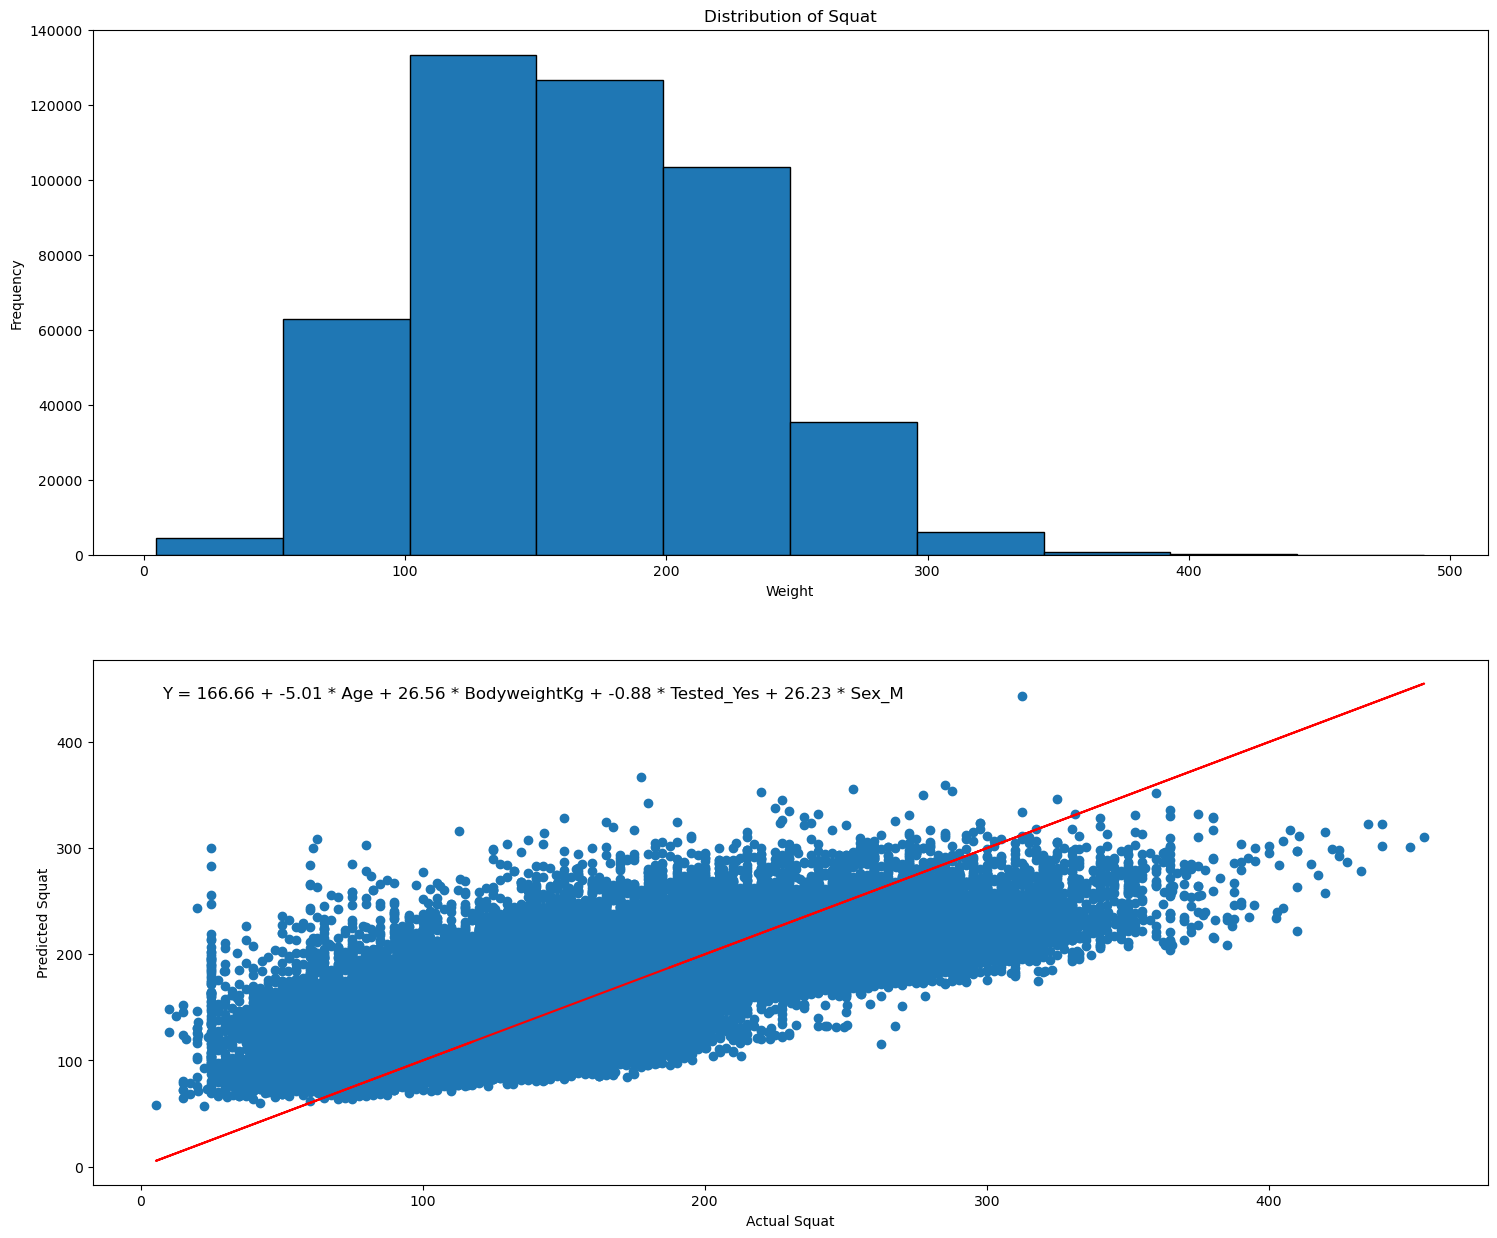

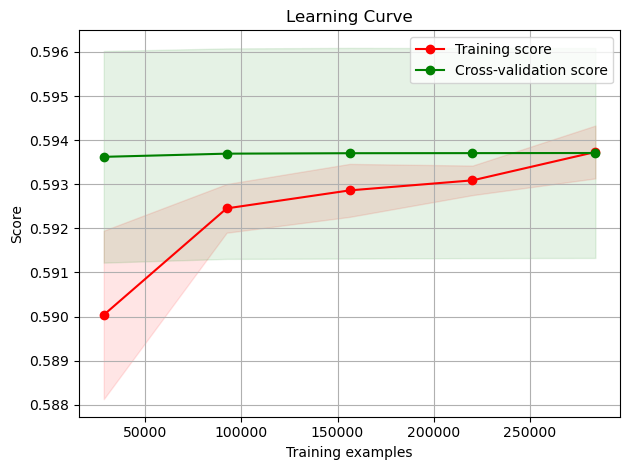

In [10]:
lr_model(squat_g)

641605 rows.
5 columns.
4 features.
MSE: 736.6576517630275
RMSE: 27.14143790890651
RRMSE: 0.24312793612034736
MAE: 20.812227025026512
RMAE: 0.1864320460708662
EV: 0.6449800854966588
R2: 0.6449766271091217
Cross-Validation RMSE: 27.09580934351098


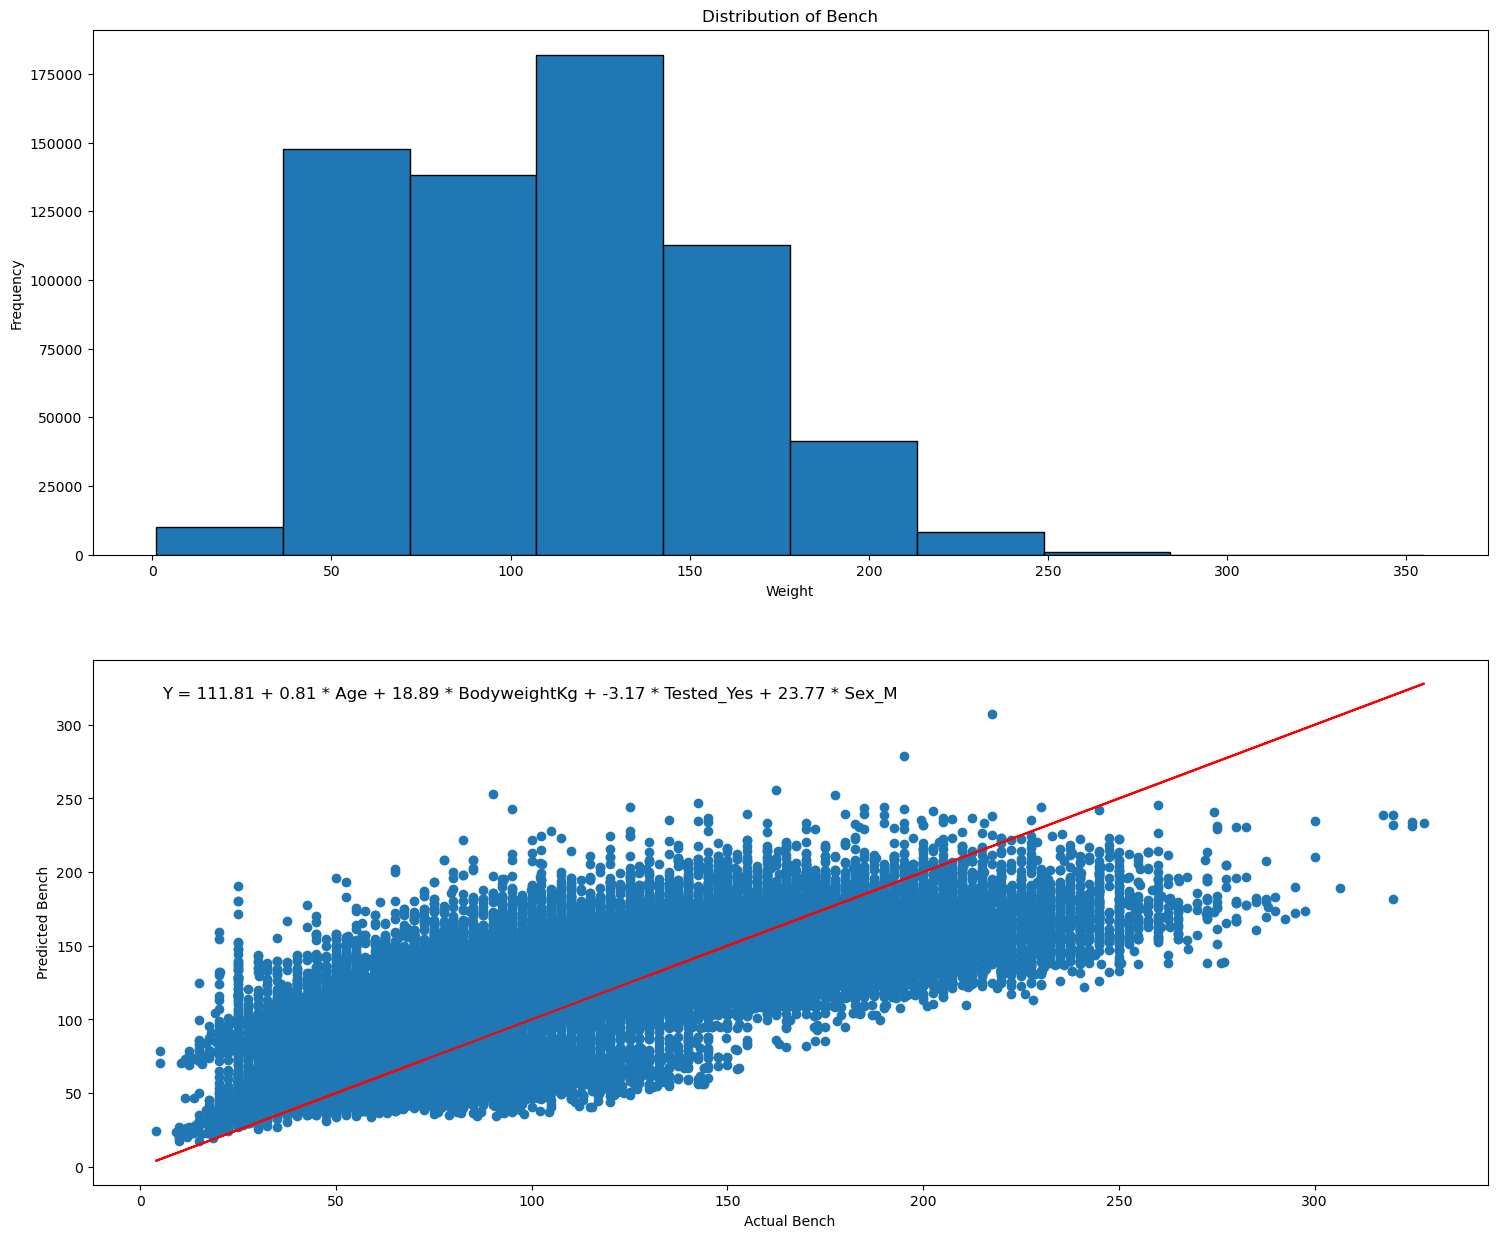

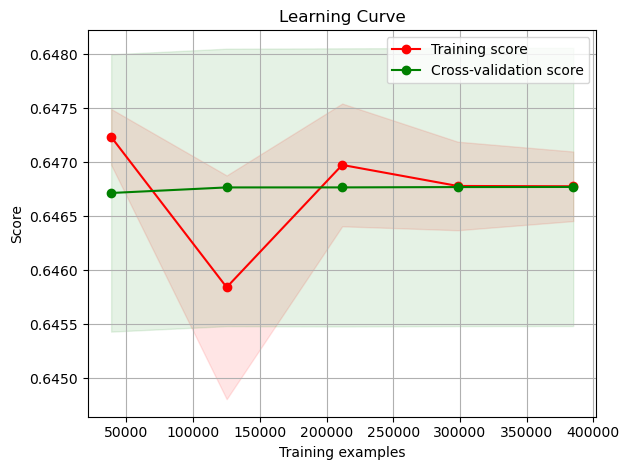

In [11]:
lr_model(bench_g)

555612 rows.
5 columns.
4 features.
MSE: 1519.895820961461
RMSE: 38.9858412883634
RRMSE: 0.20155001953005863
MAE: 29.869254354303802
RMAE: 0.15441885052394985
EV: 0.5842586731237343
R2: 0.5842586006716507
Cross-Validation RMSE: 39.00189249546608


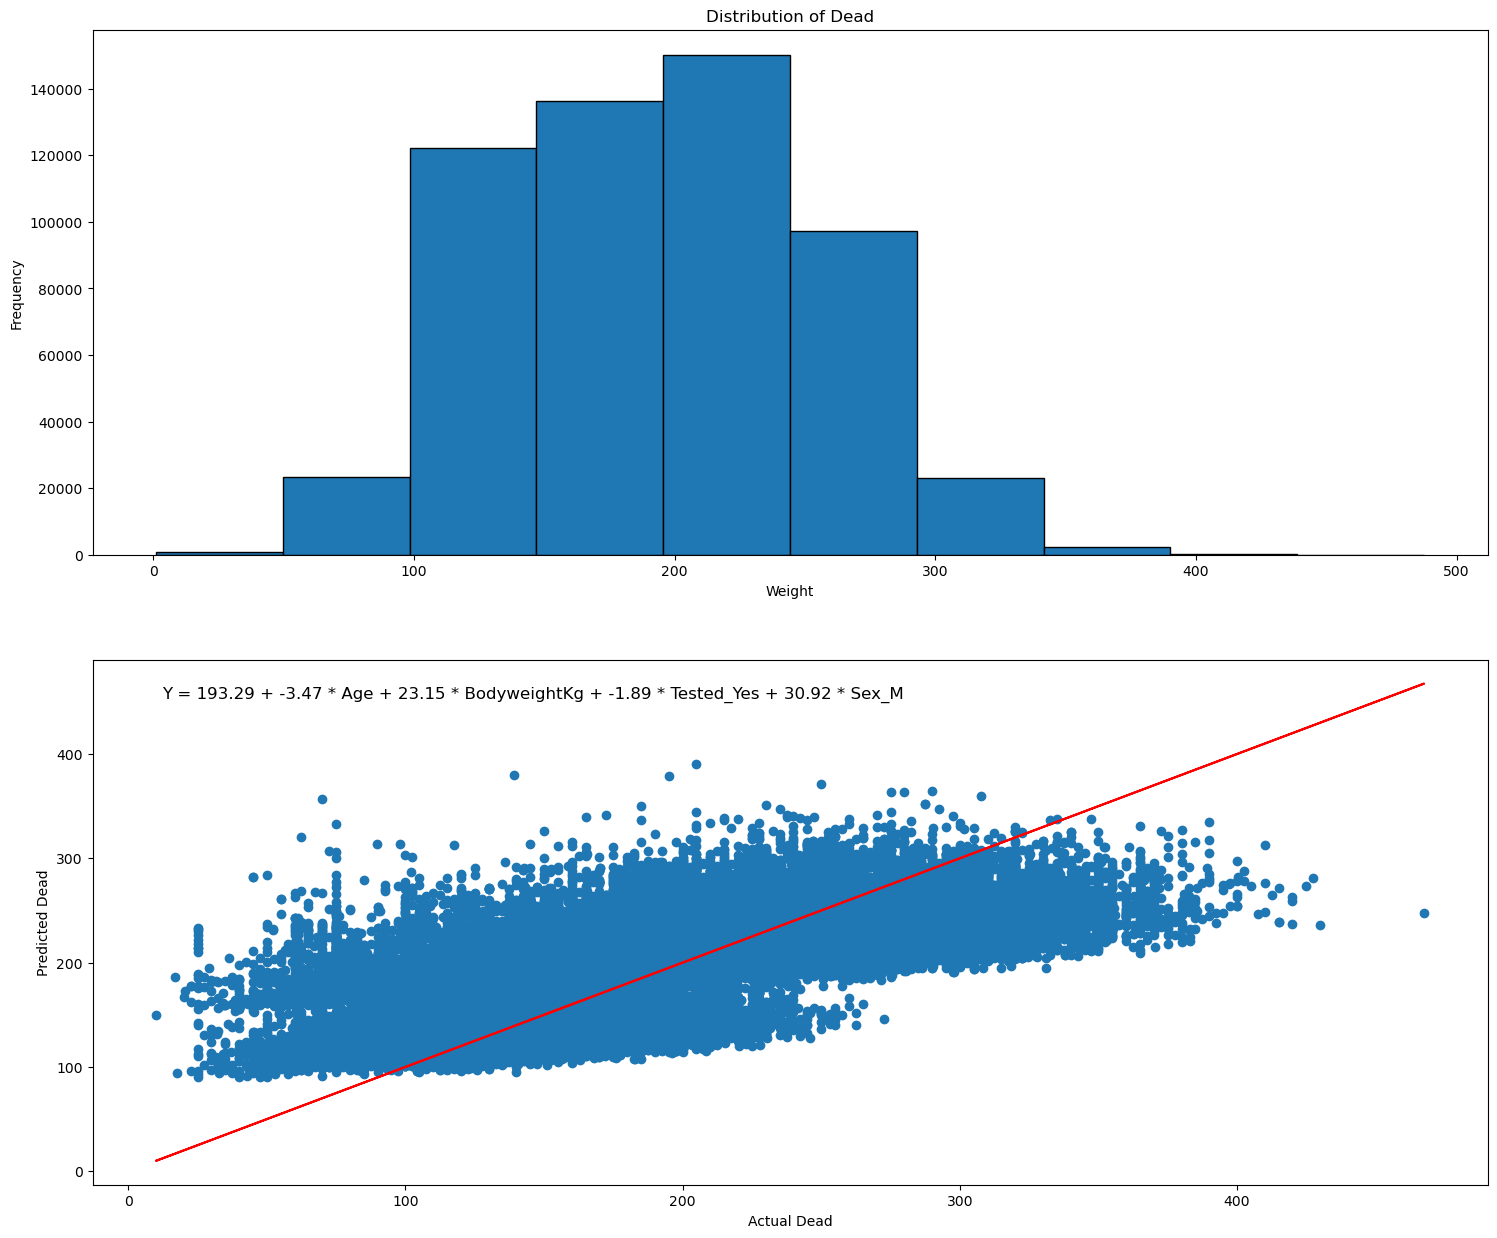

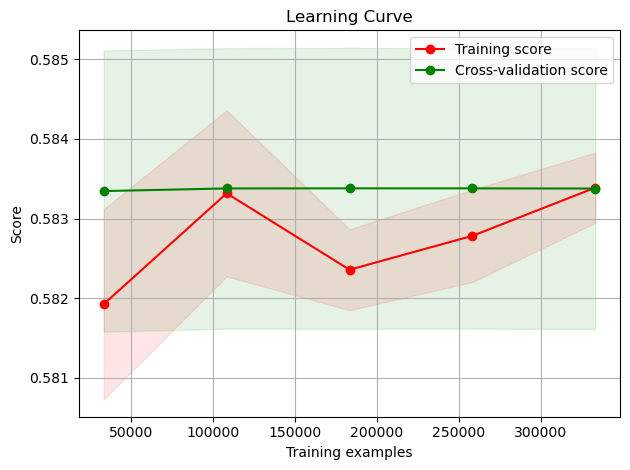

In [12]:
lr_model(dead_g)

Random Forest

In [13]:
def rf_model(total):
    # Shape of data set
    print(str(len(total))+' rows.\n'+str(len(total.columns))+' columns.')
    print(str(len(total.columns)-1)+' features.')

    # Plotting the distribution of the target variable
    plt.figure(figsize=(18, 15))
    plt.subplot(2, 1, 1)
    col = total.columns[1]
    total[col].plot(kind='hist', bins=10, edgecolor='black')
    plt.xlabel('Weight')
    plt.title('Distribution of ' + col)

    # Preprocessing
    X = total.drop([col], axis=1)
    y = total[col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Regression modeling
    rf = RandomForestRegressor(n_estimators=250, random_state=0)
    rf.fit(X_train, y_train)

    # Predictions
    plm = rf.predict(X_test)

    # Plotting Actual vs. Predicted values
    plt.subplot(2, 1, 2)
    plt.scatter(y_test, plm)
    plt.plot(y_test, y_test, "r")
    plt.xlabel('Actual ' + col)
    plt.ylabel('Predicted ' + col)

    # Evaluate the model
    print("MSE:", metrics.mean_squared_error(y_test, plm))
    print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, plm)))
    print("RRMSE:", np.sqrt(metrics.mean_squared_error(y_test, plm)) / y_test.mean())
    print("MAE:", metrics.mean_absolute_error(y_test, plm))
    print("RMAE:", metrics.mean_absolute_error(y_test, plm) / y_test.mean())
    print("EV:", metrics.explained_variance_score(y_test, plm))
    print("R2:", metrics.r2_score(y_test, plm))

    # Validation Curve Plot
    cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print("Cross-Validation RMSE:", np.sqrt(-cv_scores.mean()))
    plot_learning_curve(rf, "Learning Curve", X_train, y_train, cv=5, n_jobs=-1)

    plt.tight_layout()
    plt.show()

460615 rows.
5 columns.
4 features.
MSE: 7193.039387584833
RMSE: 84.81178802256696
RRMSE: 0.1818216625551828
MAE: 64.40555519920584
RMAE: 0.13807426299034384
EV: 0.7024714838443633
R2: 0.7024560857752031
Cross-Validation RMSE: 85.6063548412624


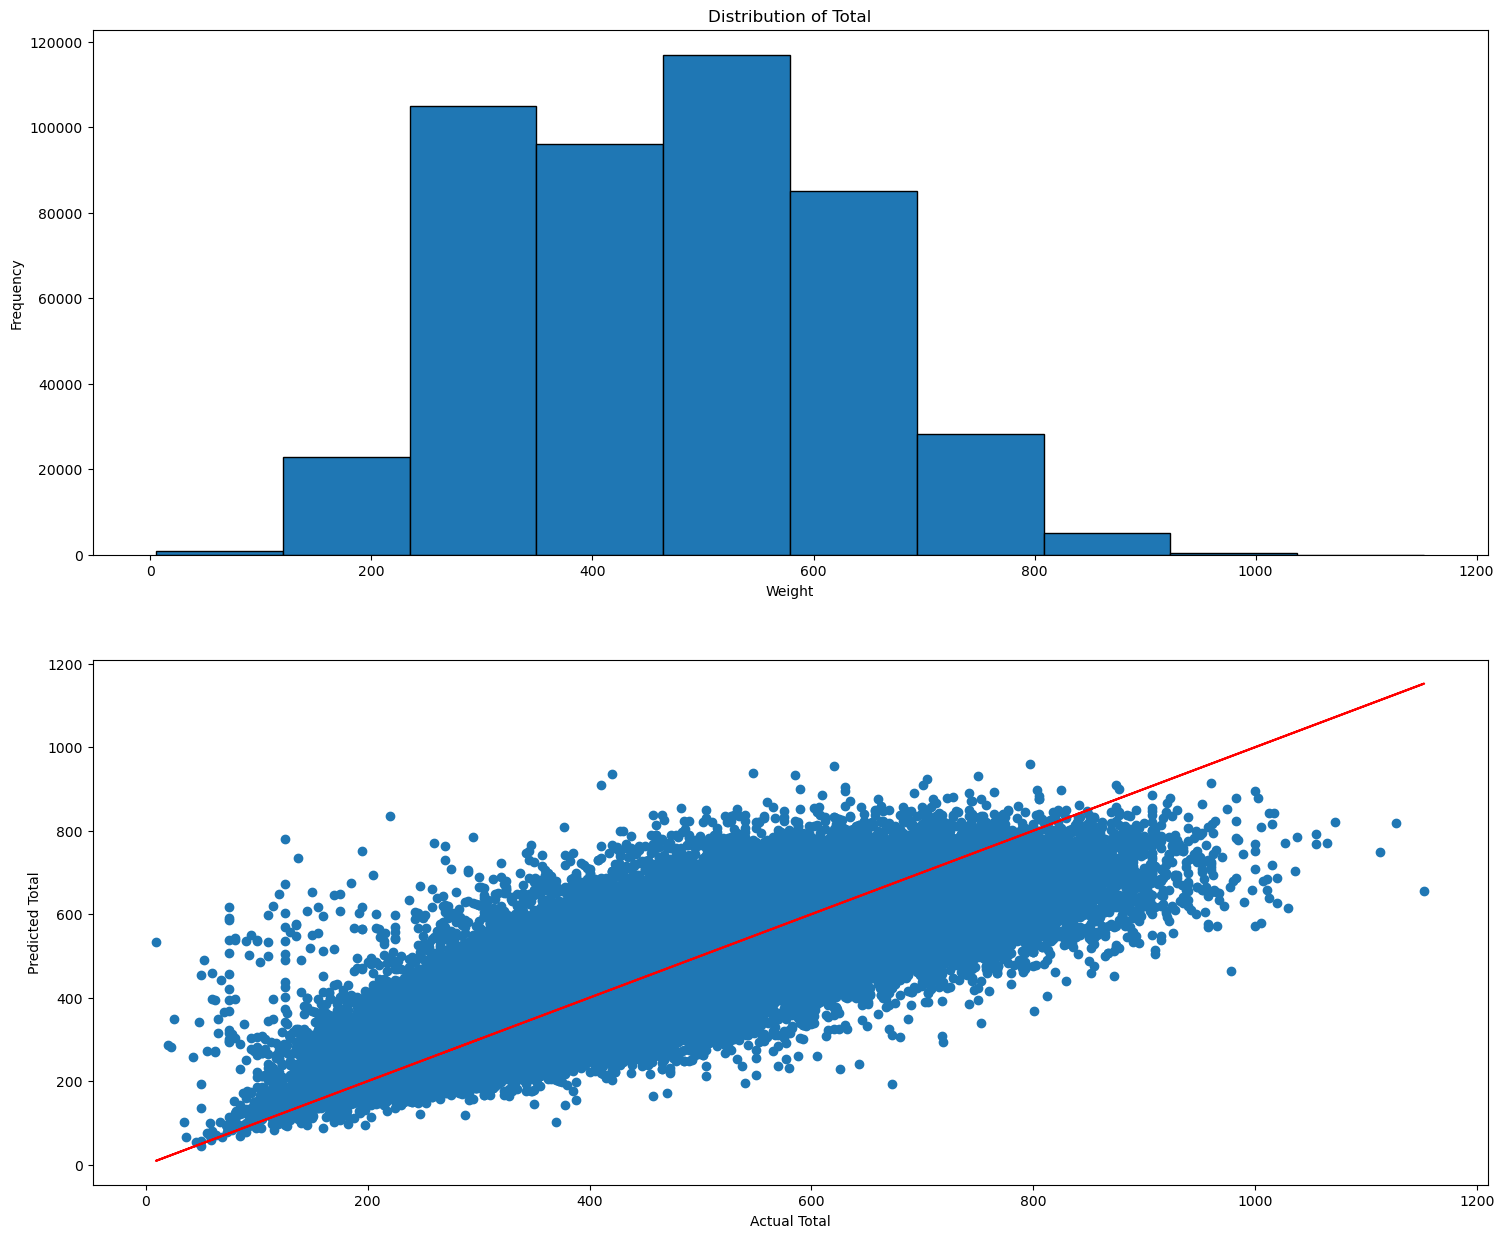

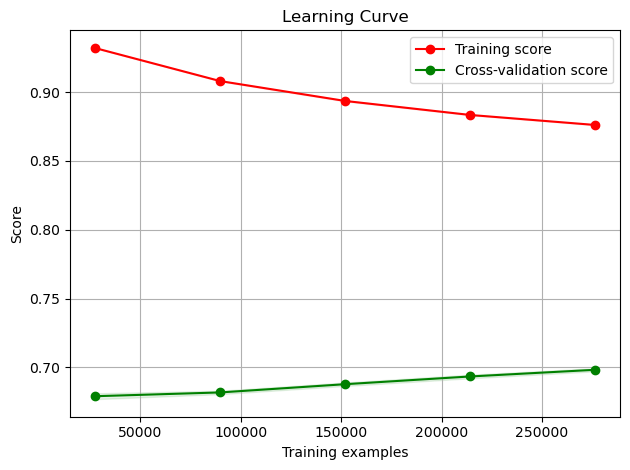

In [15]:
rf_model(total_g)

473535 rows.
5 columns.
4 features.
MSE: 1215.39189730345
RMSE: 34.86247118755998
RRMSE: 0.20920097993390285
MAE: 26.407286106181896
RMAE: 0.15846352661252194
EV: 0.6406769076584218
R2: 0.6406768637728314
Cross-Validation RMSE: 35.237869161355036


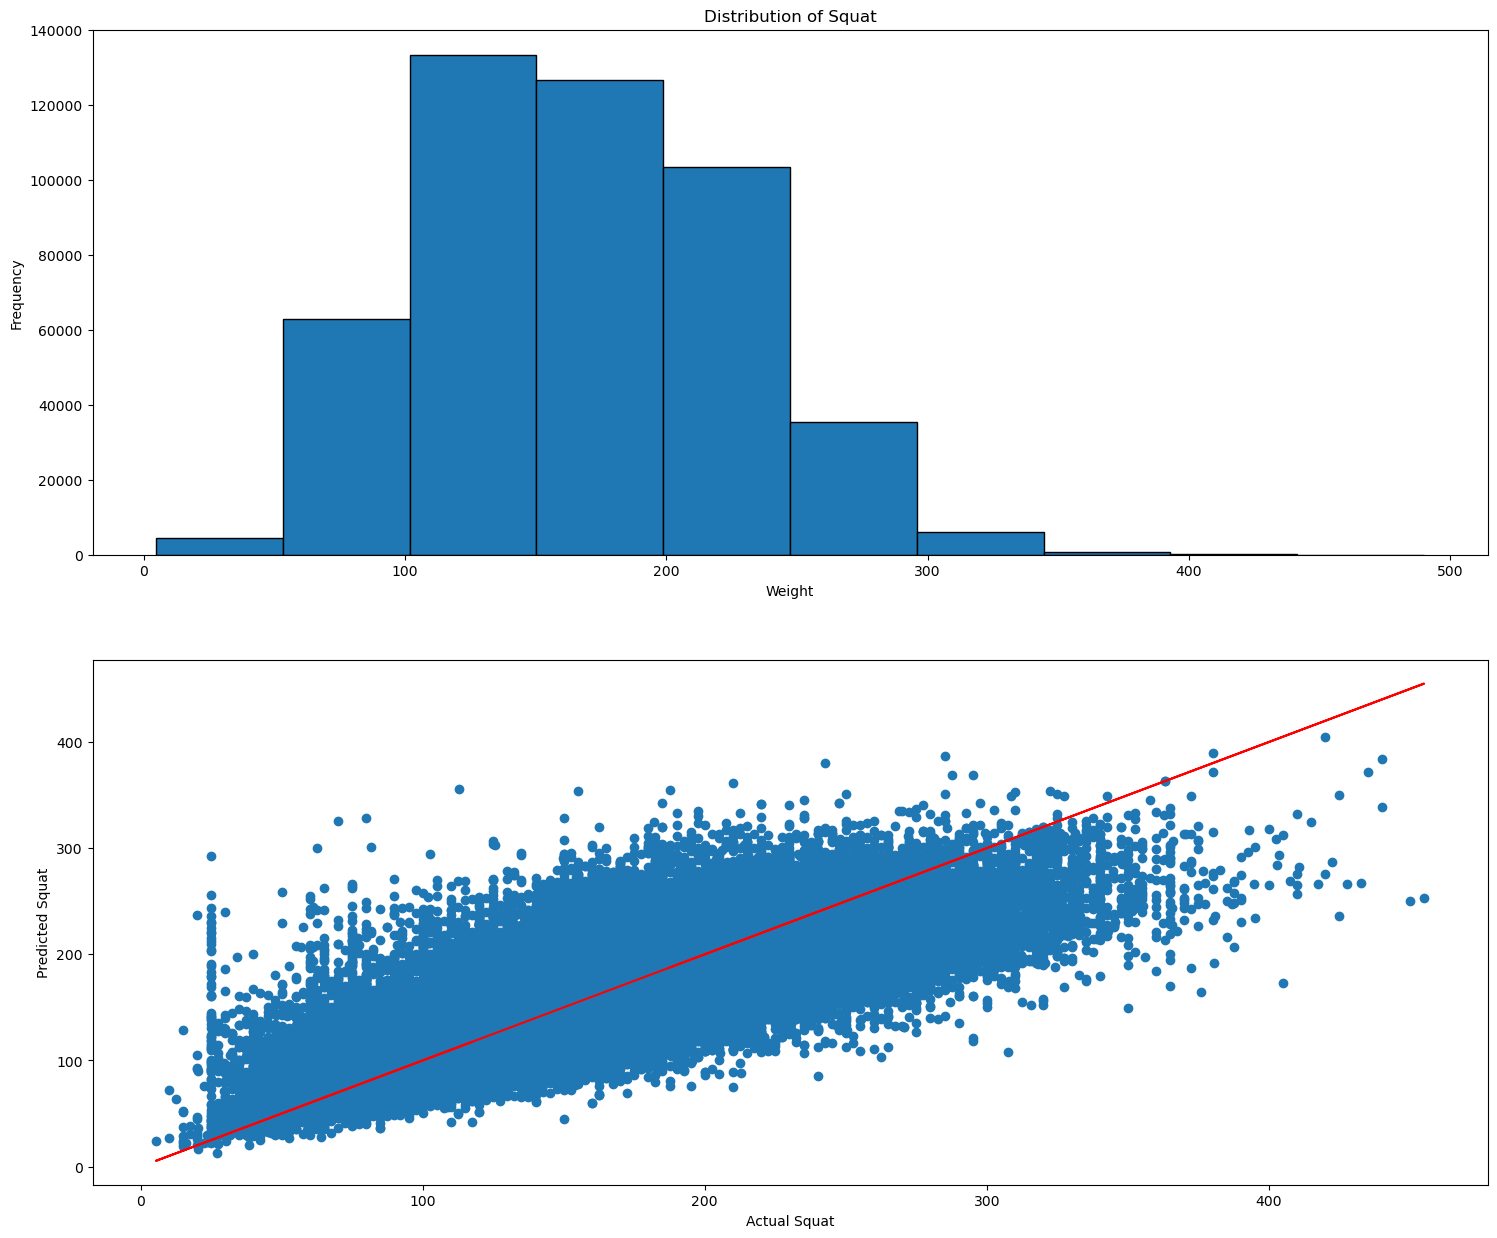

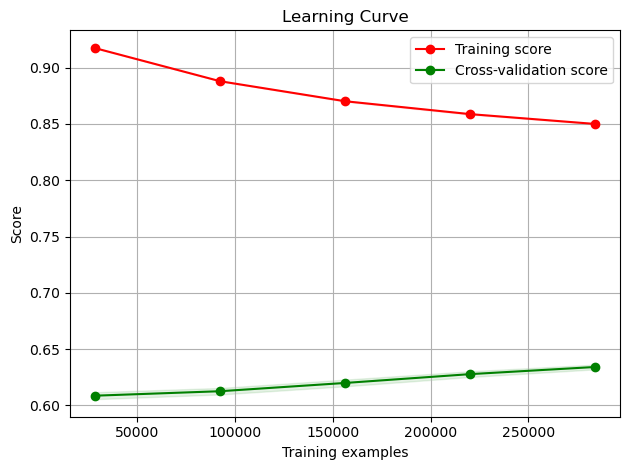

In [16]:
rf_model(squat_g)

641605 rows.
5 columns.
4 features.
MSE: 605.9629563465414
RMSE: 24.61631484090463
RRMSE: 0.22050835487215875
MAE: 18.34840535303957
RMAE: 0.1643615912891688
EV: 0.7079638351052159
R2: 0.7079633774329113
Cross-Validation RMSE: 24.835066387023375


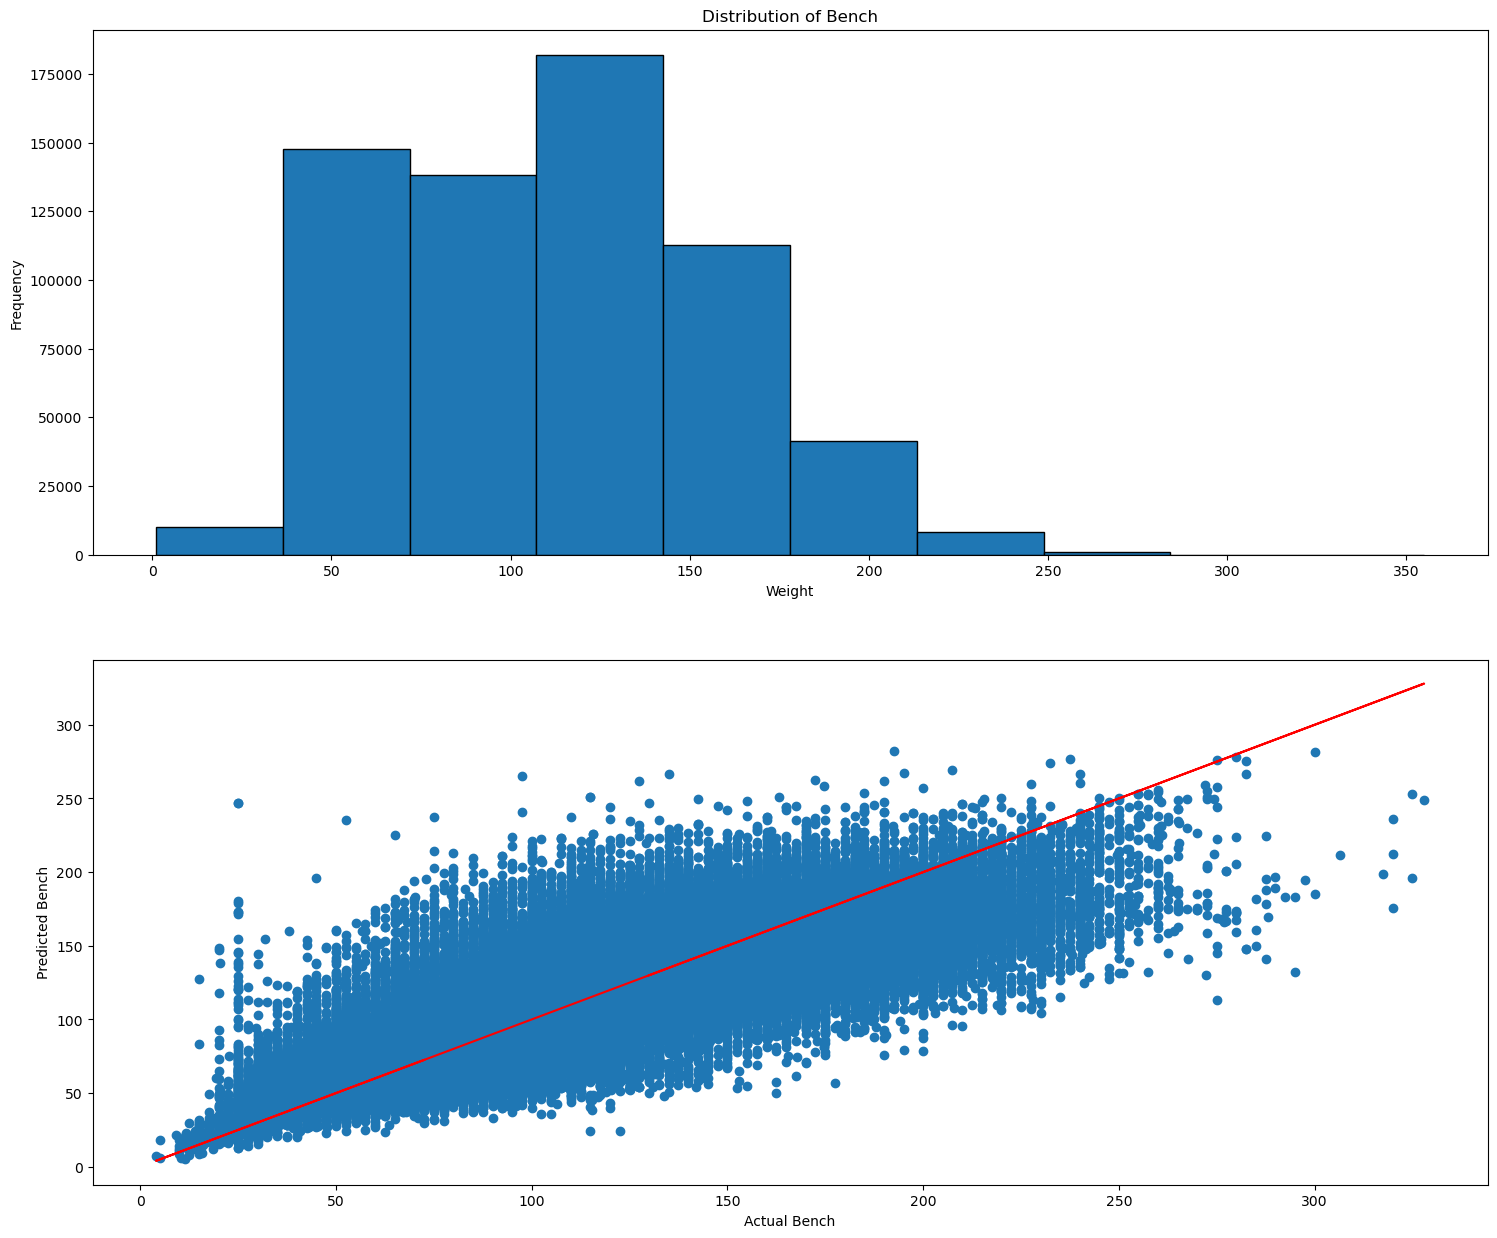

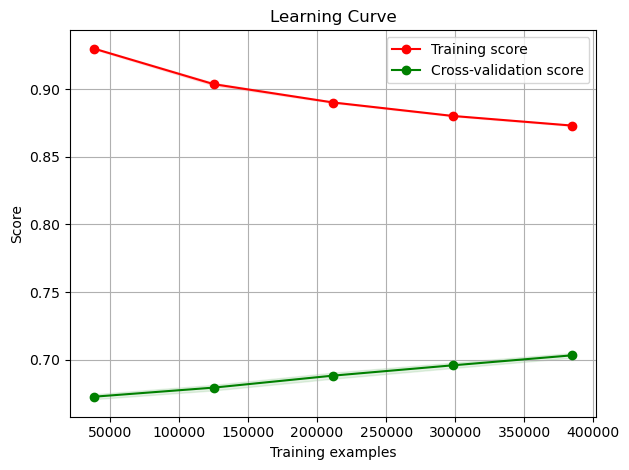

In [17]:
rf_model(bench_g)

555612 rows.
5 columns.
4 features.
MSE: 1247.2347879423203
RMSE: 35.31621140414583
RRMSE: 0.1825786712048681
MAE: 26.69254654350475
RMAE: 0.13799582359548013
EV: 0.6588403819706823
R2: 0.6588403436084682
Cross-Validation RMSE: 35.70601621138993


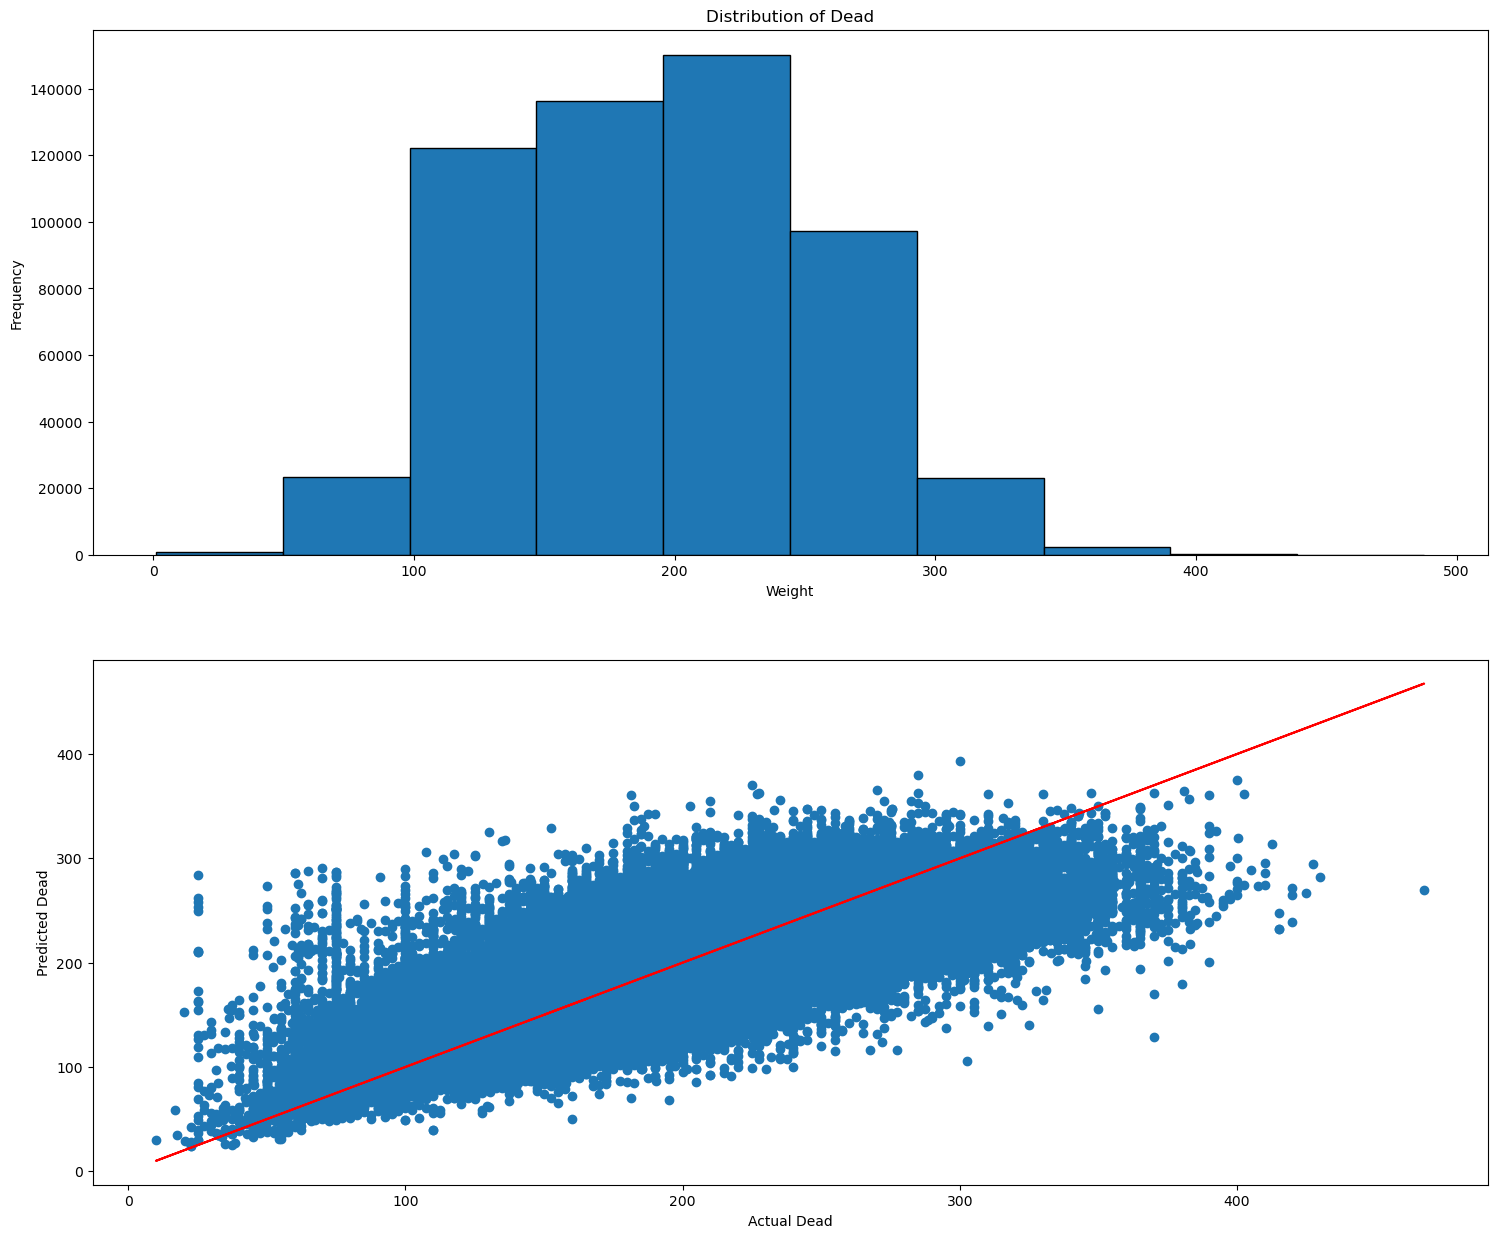

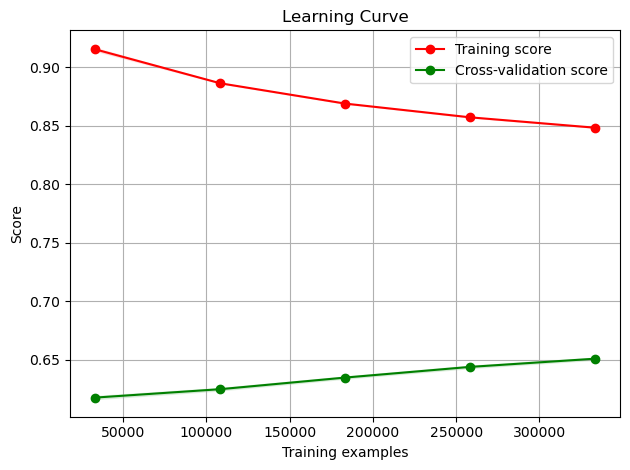

In [18]:
rf_model(dead_g)

# Top 10th Percentile per Weight Group

In [19]:
def weight(raw_df):
    weight = np.where(raw_df['Sex'] == 'F',
         np.where((raw_df['BodyweightKg']>0)&(raw_df['BodyweightKg']<=52),'Light',
                  np.where((raw_df['BodyweightKg']>52)&(raw_df['BodyweightKg']<=63),'Middle',
                           np.where((raw_df['BodyweightKg']>63)&(raw_df['BodyweightKg']<=84),'Heavy',
                                    np.where(raw_df['BodyweightKg']>84,'SuperHeavy','ERROR')))),
         np.where(raw_df['Sex'] == 'M',
                  np.where((raw_df['BodyweightKg']>0)&(raw_df['BodyweightKg']<=66),'Light',
                  np.where((raw_df['BodyweightKg']>66)&(raw_df['BodyweightKg']<=83),'Middle',
                           np.where((raw_df['BodyweightKg']>83)&(raw_df['BodyweightKg']<=105),'Heavy',
                                    np.where(raw_df['BodyweightKg']>105,'SuperHeavy','ERROR')))),'NA'))
    return weight

In [20]:
total['Weight'] = weight(total)
squat['Weight'] = weight(squat)
bench['Weight'] = weight(bench)
dead['Weight'] = weight(dead)

In [21]:
def max_strength_df(total, sex):
    summary = pd.DataFrame()
    col = total.columns[3]
    cutoff = total[total['Sex'] == sex].groupby('Weight')[col].quantile(.9).reset_index().copy()
    for x in range(len(cutoff)):
        weight = cutoff.iloc[x,0]
        strength = cutoff.iloc[x,1]
        df = total[total['Sex'] == sex][(total[total['Sex'] == sex]['Weight']==weight)&(total[total['Sex'] == sex][col]>=strength)].copy()
        summary = pd.concat([summary, df], axis = 0, ignore_index = True)
    return summary

In [22]:
total_t = pd.get_dummies(pd.concat([max_strength_df(total,'M'),max_strength_df(total,'F')], axis = 0, ignore_index = True)
                         ,columns = ['Tested','Sex'], drop_first = True).drop('Weight', axis = 1)
squat_t = pd.get_dummies(pd.concat([max_strength_df(squat,'M'),max_strength_df(squat,'F')], axis = 0, ignore_index = True)
                         ,columns = ['Tested','Sex'], drop_first = True).drop('Weight', axis = 1)
bench_t = pd.get_dummies(pd.concat([max_strength_df(bench,'M'),max_strength_df(bench,'F')], axis = 0, ignore_index = True)
                         ,columns = ['Tested','Sex'], drop_first = True).drop('Weight', axis = 1)
dead_t = pd.get_dummies(pd.concat([max_strength_df(dead,'M'),max_strength_df(dead,'F')], axis = 0, ignore_index = True)
                        ,columns = ['Tested','Sex'], drop_first = True).drop('Weight', axis = 1)

Linear Regression

46923 rows.
5 columns.
4 features.
MSE: 2502.842127988356
RMSE: 50.028413206780364
RRMSE: 0.08006631006765098
MAE: 37.54527509500365
RMAE: 0.06008808684190683
EV: 0.8985242824051228
R2: 0.8985242577362806
Cross-Validation RMSE: 50.577416748063825


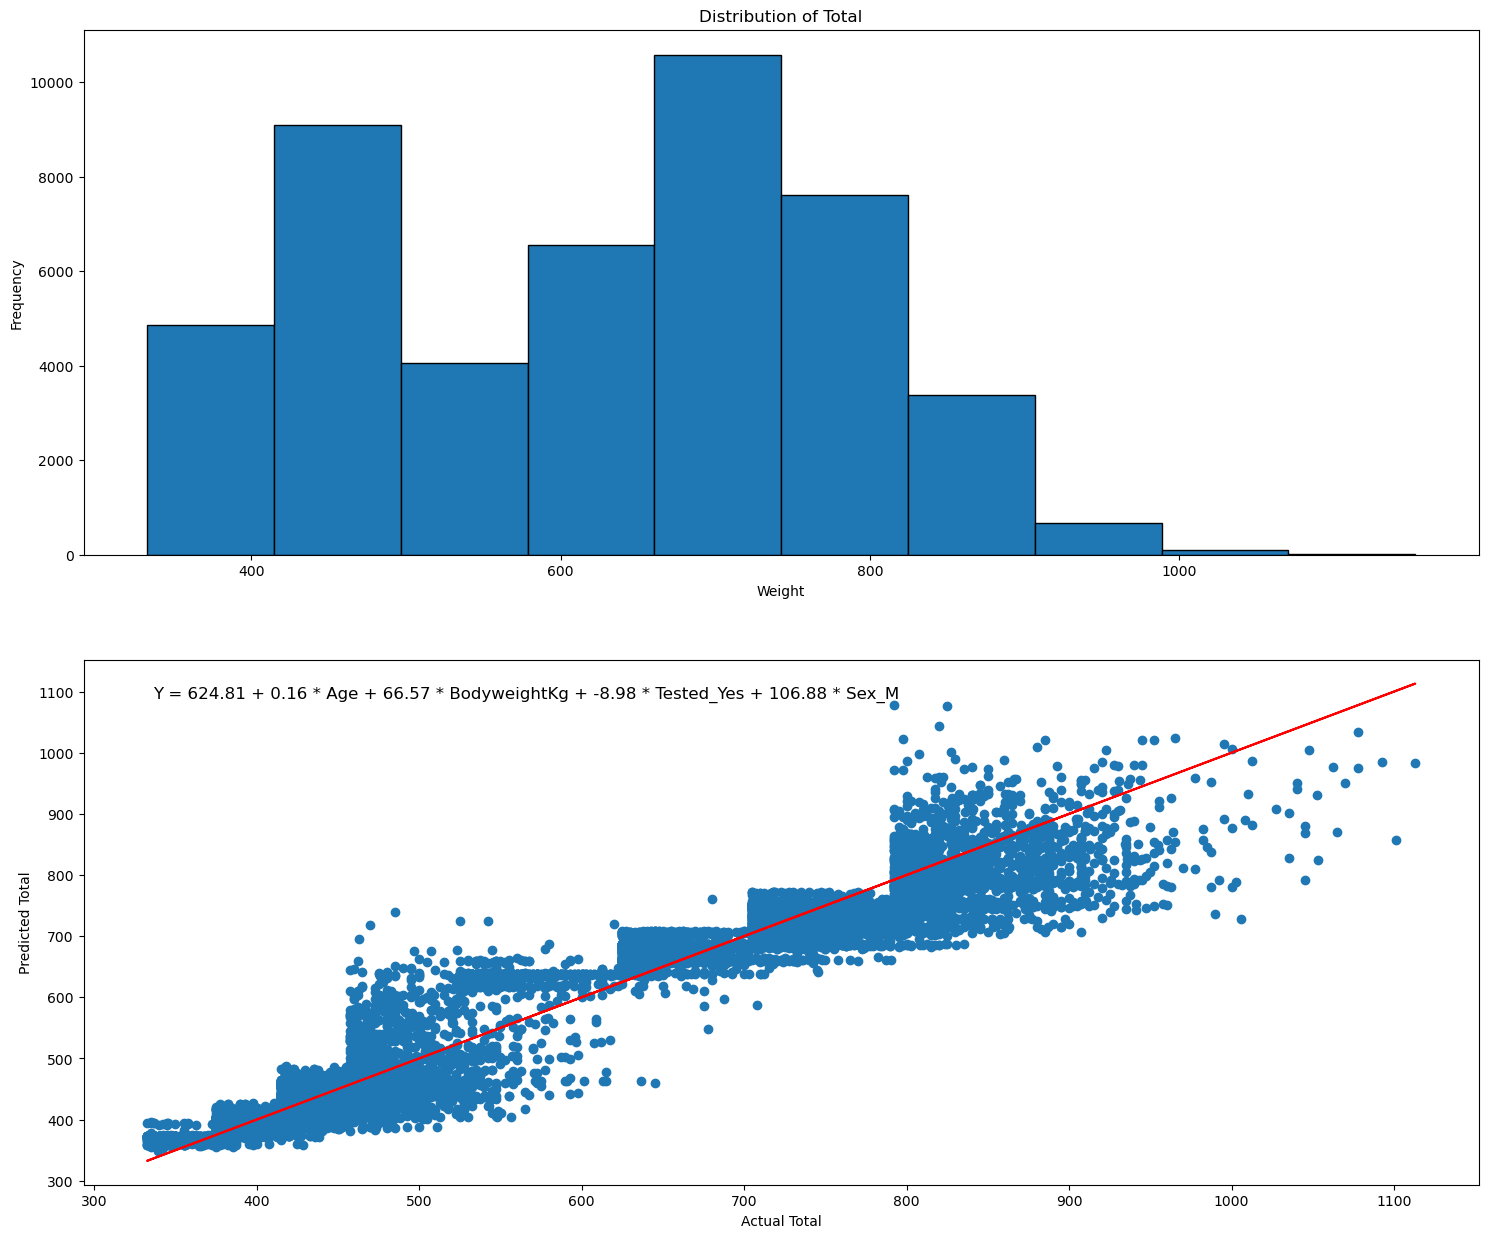

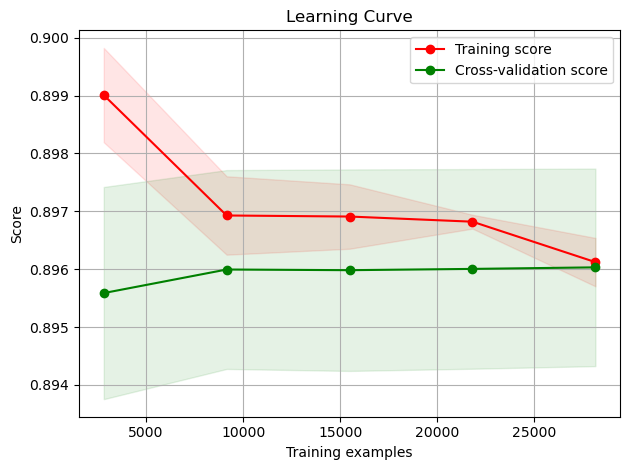

In [23]:
lr_model(total_t)

50271 rows.
5 columns.
4 features.
MSE: 425.5462352524431
RMSE: 20.62877202483083
RRMSE: 0.08974194587811096
MAE: 15.378102881915924
RMAE: 0.0668998074570674
EV: 0.8777885121247191
R2: 0.8777871610339595
Cross-Validation RMSE: 20.46767505987973


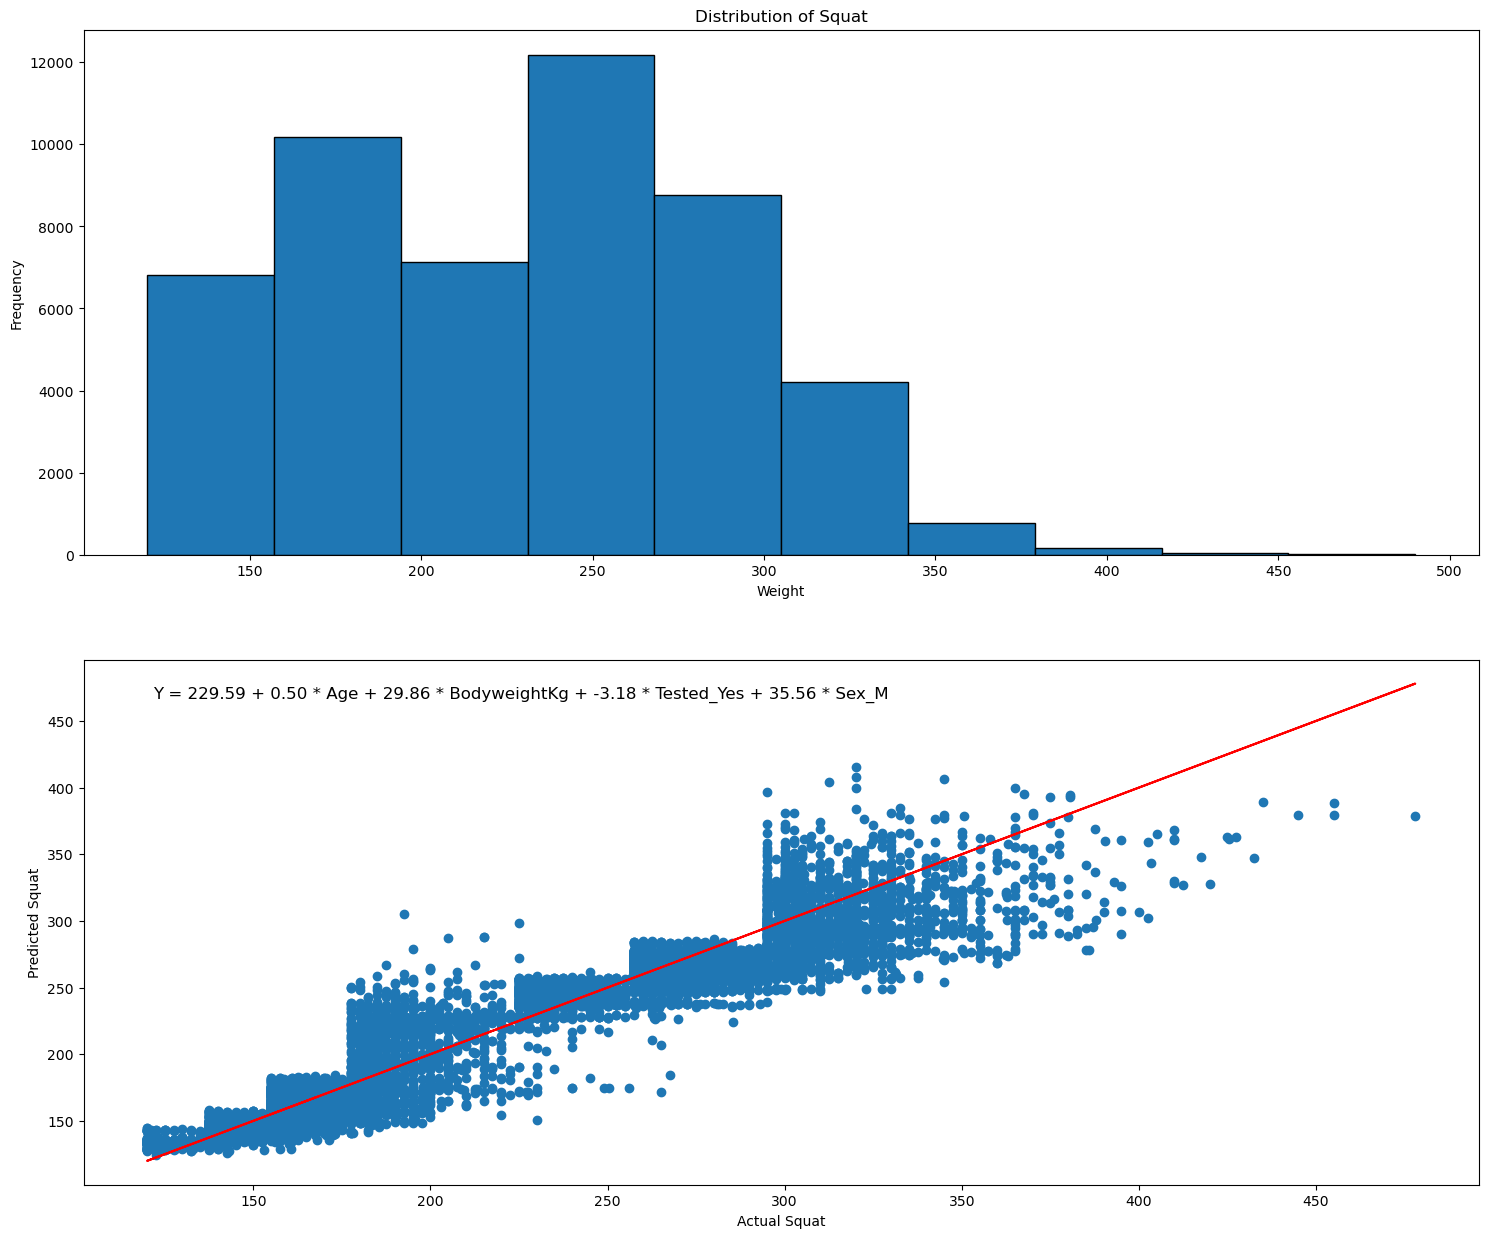

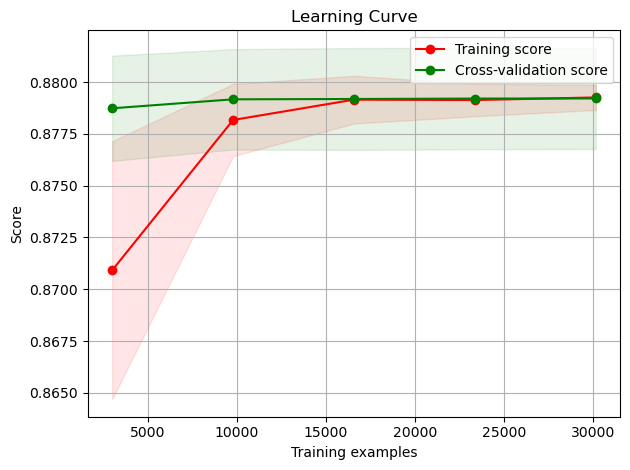

In [24]:
lr_model(squat_t)

70298 rows.
5 columns.
4 features.
MSE: 295.2523170016793
RMSE: 17.182907699271368
RRMSE: 0.10839176735419094
MAE: 12.87577638888664
RMAE: 0.0812218853336427
EV: 0.8752214581850718
R2: 0.8751909039050828
Cross-Validation RMSE: 16.917551411246407


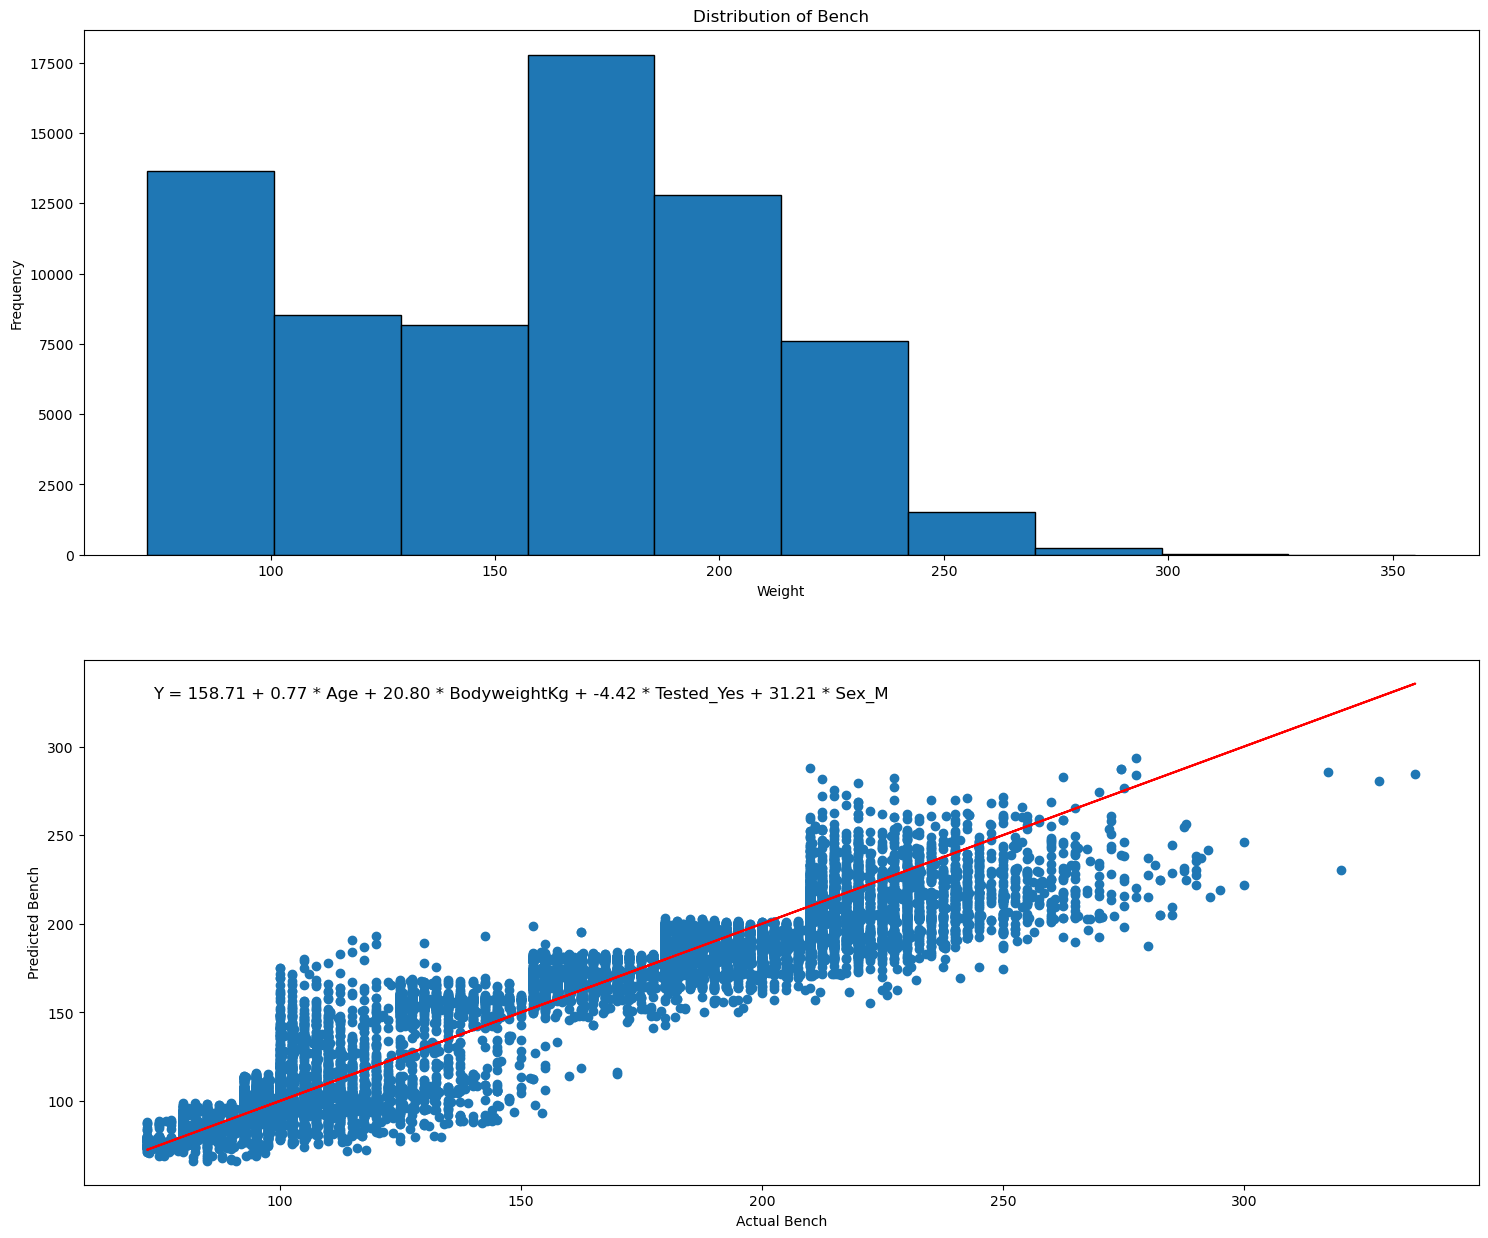

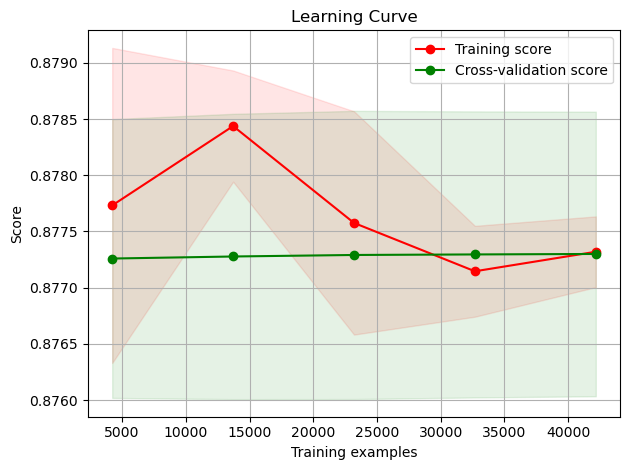

In [25]:
lr_model(bench_t)

57074 rows.
5 columns.
4 features.
MSE: 423.03624368350756
RMSE: 20.567844896427715
RRMSE: 0.08017393548785817
MAE: 15.230475447558147
RMAE: 0.059368745832676754
EV: 0.8805603738298579
R2: 0.8805570881714759
Cross-Validation RMSE: 20.403402368992367


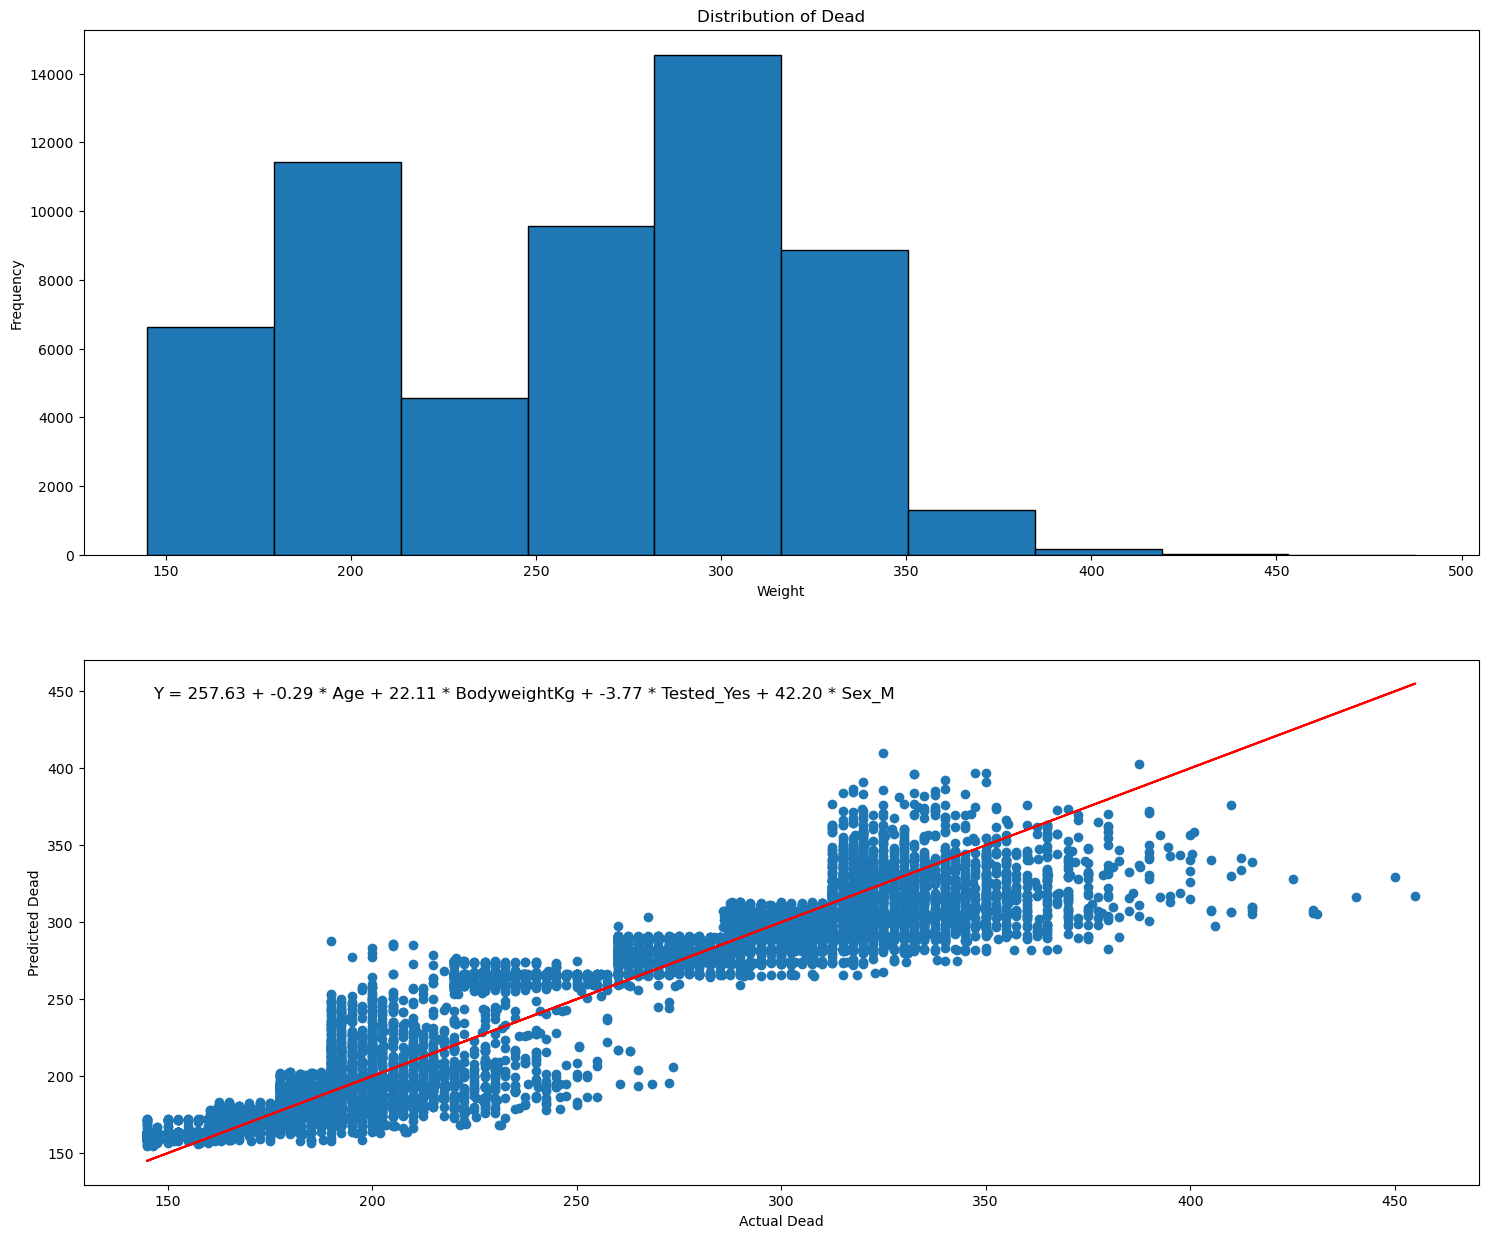

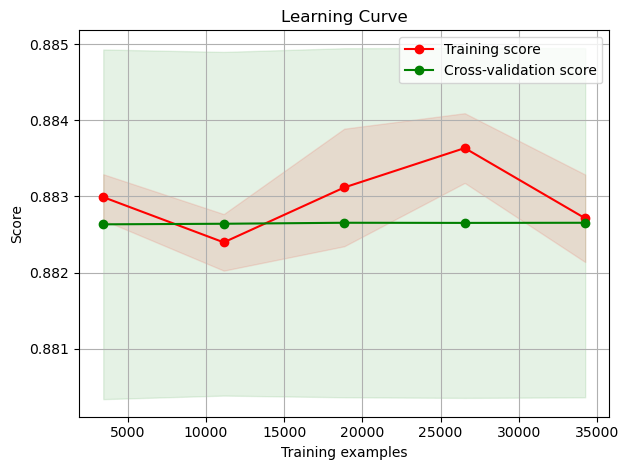

In [26]:
lr_model(dead_t)

Random Forest

46923 rows.
5 columns.
4 features.
MSE: 1729.4204193463756
RMSE: 41.586300861538234
RRMSE: 0.06655541213318499
MAE: 30.60597275695985
RMAE: 0.048982311202880775
EV: 0.9298925641864364
R2: 0.9298820254075479
Cross-Validation RMSE: 42.725416483760014


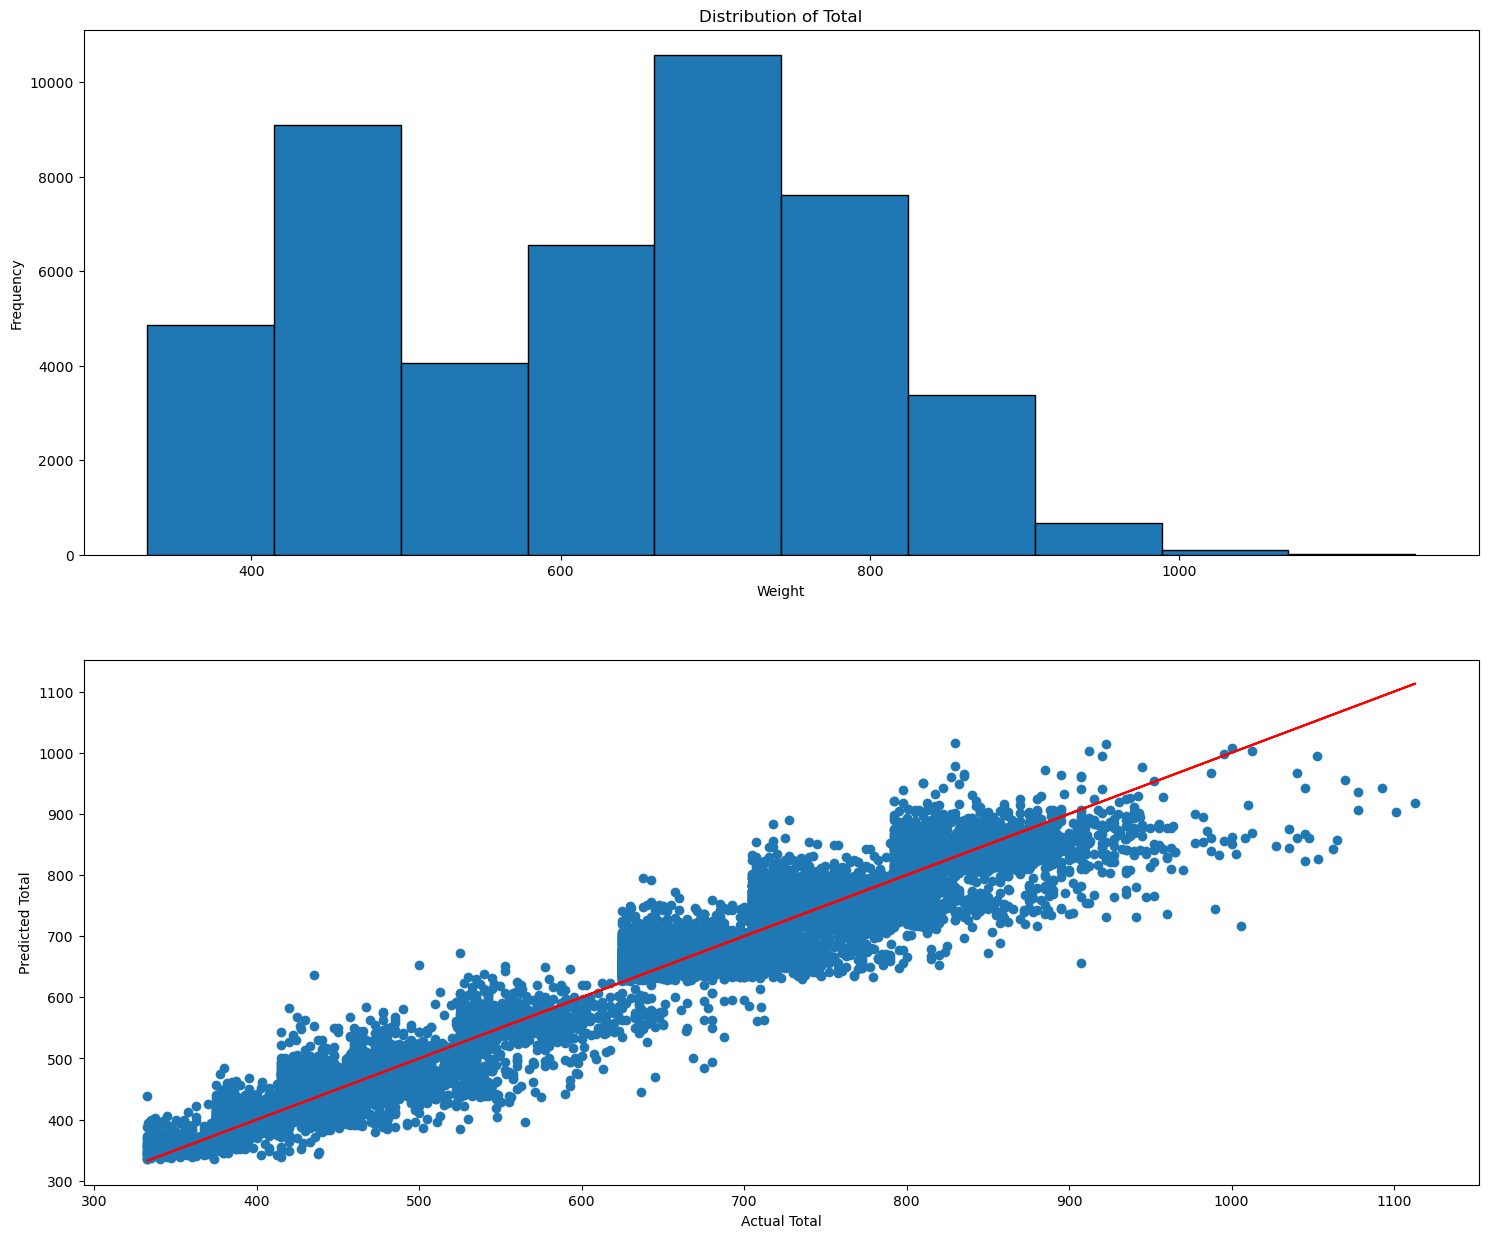

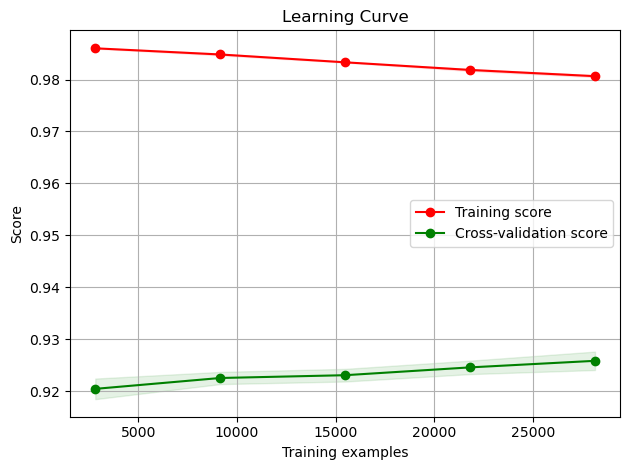

In [27]:
rf_model(total_t)

50271 rows.
5 columns.
4 features.
MSE: 298.07173706727
RMSE: 17.264754184965103
RRMSE: 0.07510736139800517
MAE: 12.487217637901662
RMAE: 0.054323505445688466
EV: 0.9144199946571059
R2: 0.9143966267709541
Cross-Validation RMSE: 17.542323395881432


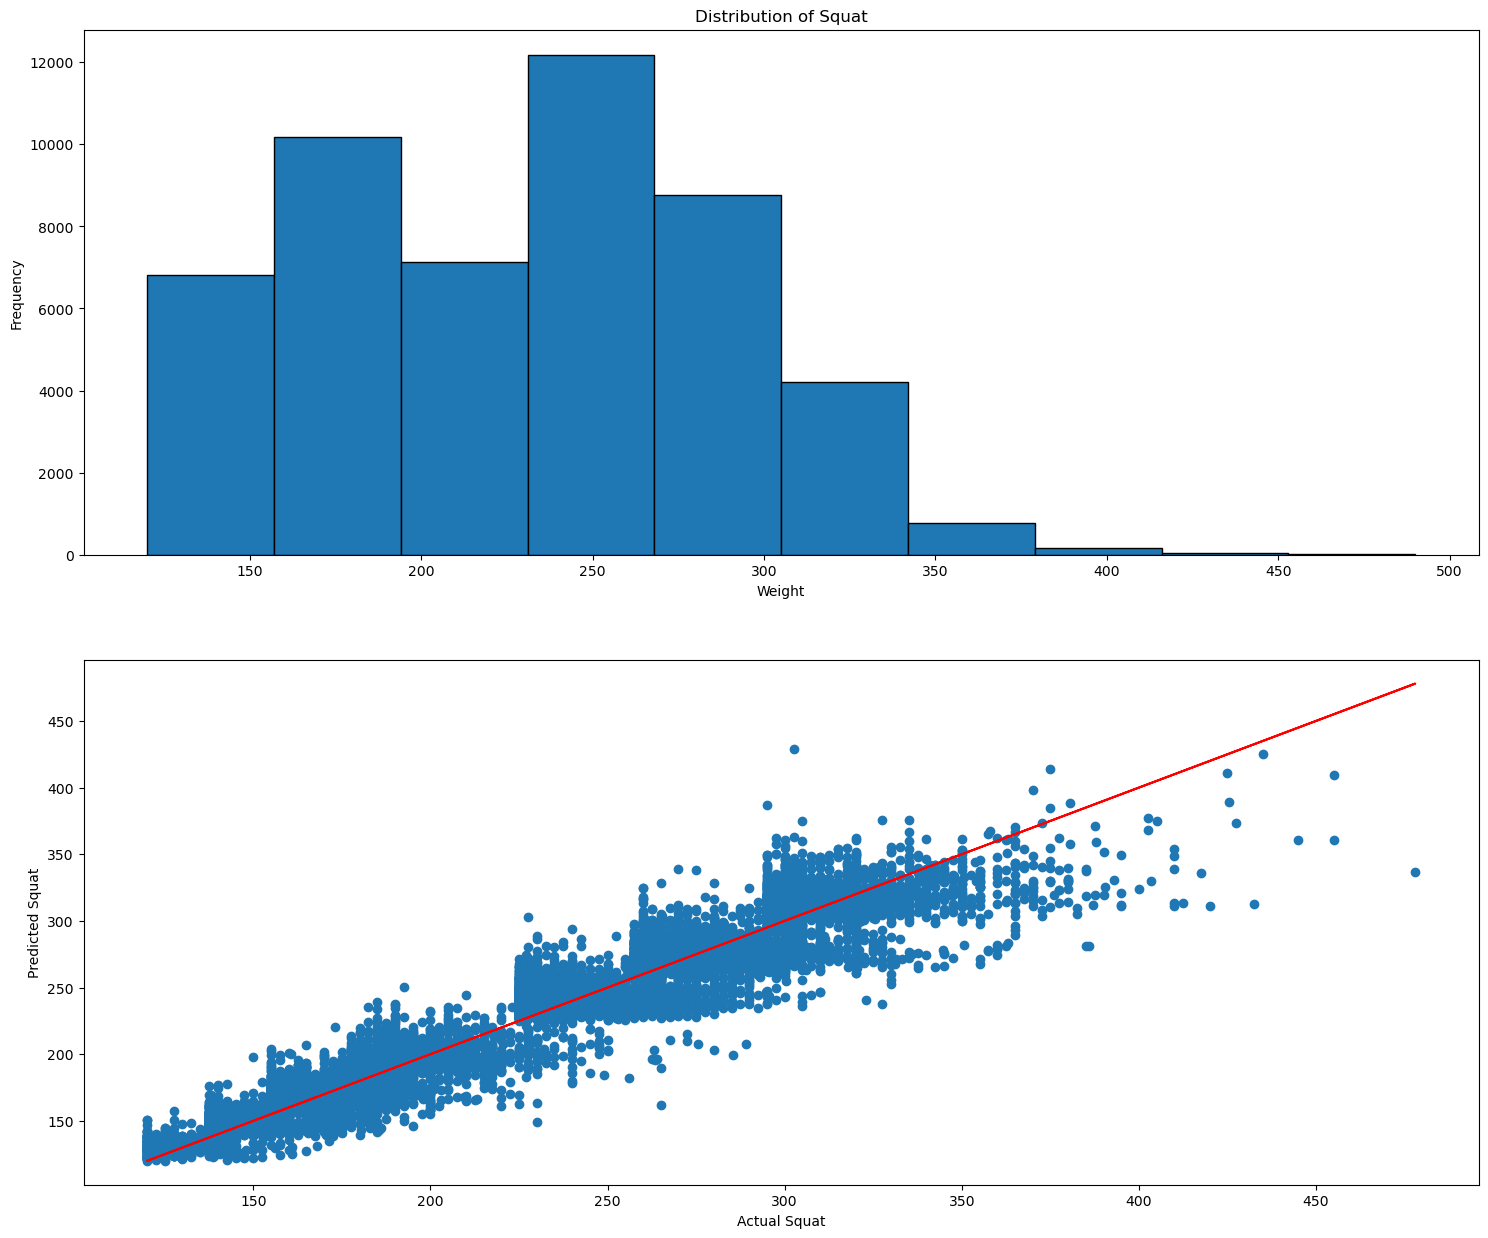

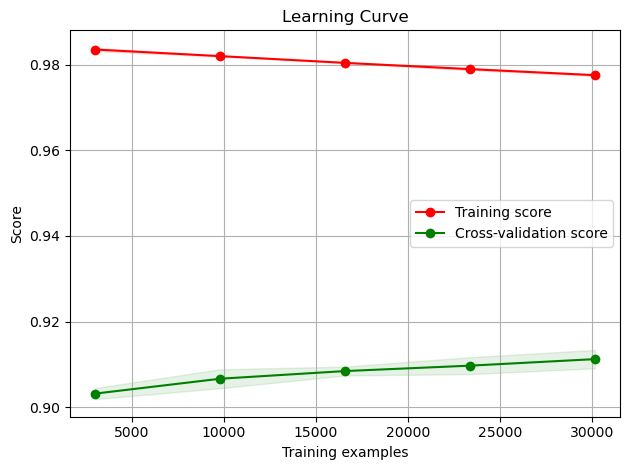

In [28]:
rf_model(squat_t)

70298 rows.
5 columns.
4 features.
MSE: 190.19925232370275
RMSE: 13.791274499613976
RRMSE: 0.08699695320736274
MAE: 9.884055553591756
RMAE: 0.06234976459346555
EV: 0.9196010329094756
R2: 0.9195989484468113
Cross-Validation RMSE: 13.868340866133536


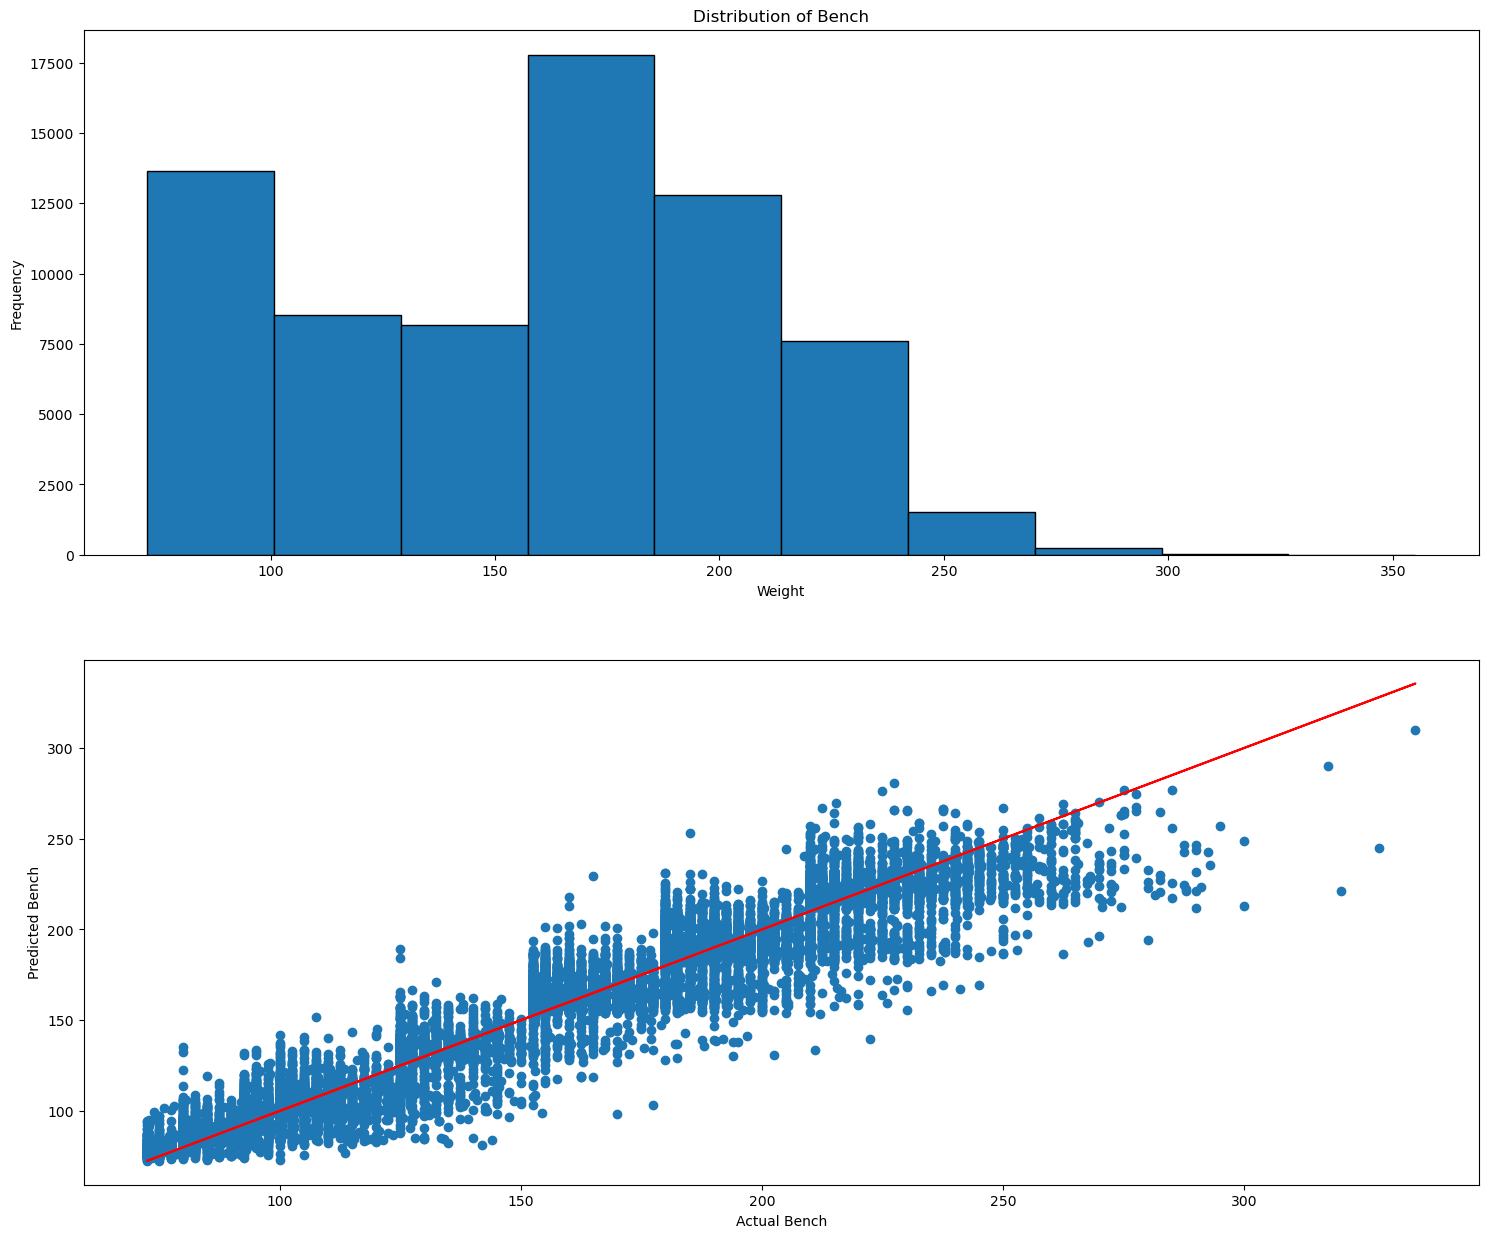

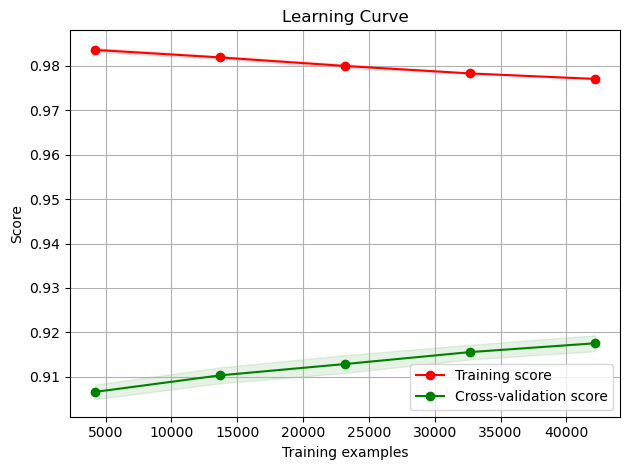

In [29]:
rf_model(bench_t)

57074 rows.
5 columns.
4 features.
MSE: 298.2985686758967
RMSE: 17.271322146144364
RRMSE: 0.06732401350301387
MAE: 12.34511995582299
RMAE: 0.048121563338895404
EV: 0.9157869395510445
R2: 0.9157763662832015
Cross-Validation RMSE: 17.449206256571706


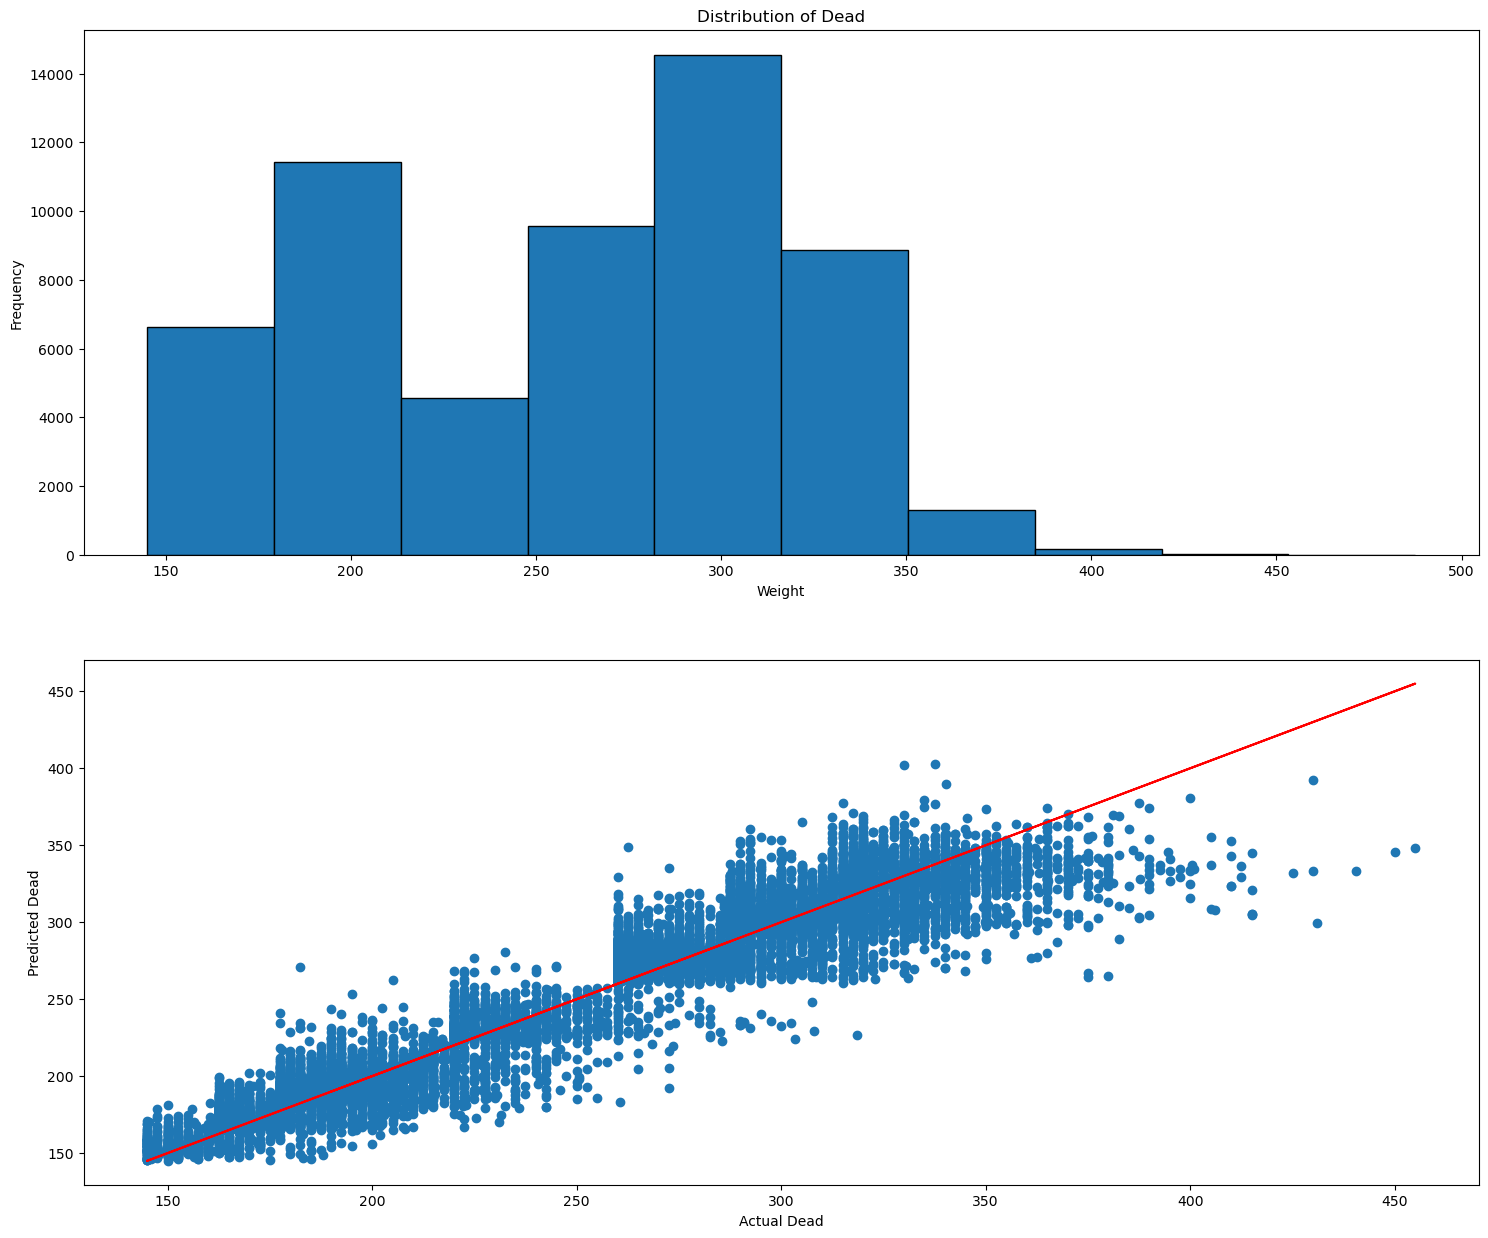

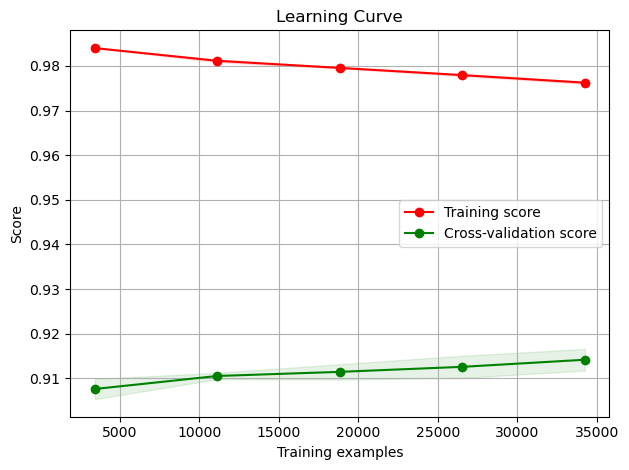

In [30]:
rf_model(dead_t)